In [1]:
# Main notebook for plotting WACCM vs COSMIC data (dataset from David Themens)

# Must run all sections before 'PLOTTING' before running any of the sections below this
# Turn on/off fivedegbins switch to change file paths for data sources, depending on whether you want 5 degree lat-lon bins or higher res 

In [190]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec

/tmp/ipykernel_442591/1426135172.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


# WACCM Data Loading

In [191]:
# WACCM_data_alt = '90-130km'
# WACCM_UL = 130

WACCM_data_alt = '90-150km'
WACCM_UL = 150

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']


#run_name = 'Jianfei_run'
run_name = 'Wuhu_IonTr_run'
#run_name = 'Wuhu_IonTr_run_No_glbavg'

filename_append = '0sigma_0.5xMpza_0.5xpeak'      

win_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{win_Monthfolderstr}_{WACCM_data_alt}_{filename_append}.nc'
spr_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{spr_Monthfolderstr}_{WACCM_data_alt}_{filename_append}.nc'
sum_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{sum_Monthfolderstr}_{WACCM_data_alt}_{filename_append}.nc'
aut_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{aut_Monthfolderstr}_{WACCM_data_alt}_{filename_append}.nc'


ds_months_ar = np.arange(0,3)   

ds_win = xr.open_dataset(win_file, decode_times=False)
ds_spr = xr.open_dataset(spr_file, decode_times=False)
ds_sum = xr.open_dataset(sum_file, decode_times=False)
ds_aut = xr.open_dataset(aut_file, decode_times=False)

#print(str(win_file))
ds_aut

<xarray.Dataset>
Dimensions:                    (lev: 126, lev_sl: 23, time: 336, lat: 96,
                                latsl: 36, lon: 144, LT: 48, LT_L: 144,
                                timesl: 2, mth: 3)
Coordinates:
  * lev                        (lev) float64 4.055e-10 5.207e-10 ... 970.6 992.6
  * lev_sl                     (lev_sl) float64 5.418e-06 6.956e-06 ... 0.001329
  * time                       (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                        (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                      (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                        (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                         (LT) float64 0.0 0.5 1.0 1.5 ... 22.5 23.0 23.5
  * LT_L                       (LT_L) float64 0.0 0.1667 0.3333 ... 23.67 23.83
  * timesl                     (timesl) float64 0.0 1.0
  * mth                        (mth) float64 9.0 10.0 11.0
Data variables: (12/29)
    Zavg_sl                    (lev_sl) float64 ...
    altavg                     (lev) float64 ...
    altavg_sl                  (lev_sl) float64 ...
    times_str_min              (mth, timesl) object ...
    times_str_max              (mth, timesl) object ...
    SpEsns_Occ_Freq_lat        (lat) float64 ...
    ...                         ...
    Mptdens_nsavg              (lev_sl, lat, lon, timesl, mth) float64 ...
    Mptdens_avv1_b_5d          (lev_sl, latsl, timesl, mth) float64 ...
    Mptdens_std                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    Mptdens_avg                (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEs_freq_time             (lev_sl, lat, LT_L, timesl, mth) float64 ...
    SpEsns_freq_time           (lev_sl, lat, lon, timesl, mth) float64 ...

In [192]:

lev_sl = ds_win.variables['lev_sl']
lat = ds_win.variables['lat']
intlat = ds_win.variables['latsl']
lon = ds_win.variables['lon']
LT = ds_win.variables['LT']

#Zavg_sl = ds_win.variables['Zavg_sl']

altavg_sl_win = ds_win.variables['altavg_sl']
altavg_sl_spr = ds_spr.variables['altavg_sl']
altavg_sl_sum = ds_sum.variables['altavg_sl']
altavg_sl_aut = ds_aut.variables['altavg_sl']

times_str_min = ds_win.variables['times_str_min']
times_str_max = ds_win.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 
#win_SpEs_Occ_Fr_b_dsavglevLT = ds_win.variables['SpEs_Occ_Fr_b_dsavglevLT']   # LAT line plot 
#win_SpEsns_Occ_Fr_dsavglev = ds_win.variables['SpEsns_Occ_Fr_dsavglev']       # LAT - LON over all heights
#win_SpEs_Occ_Fr_b_dsavglev = ds_win.variables['SpEs_Occ_Fr_b_dsavglev']       # LAT - LT over all heights

win_SpEs_Occ_Freq_llbav = ds_win.variables['SpEs_Occ_Freq_llbav']  #lat,LT
win_SpEsns_Occ_Freq_llav = ds_win.variables['SpEsns_Occ_Freq_llav']  #lat,lon
win_SpEsns_Occ_Freq_lat = ds_win.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

win_SpEsns_Occ_Fr_dsavg = ds_win.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
win_SpEs_Occ_Fr_b_dsavg = ds_win.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
win_alt_sl_sh_avg_b_dsavg = ds_win.variables['alt_sl_sh_avg_b_dsavg']
win_alt_sl_sh_avg_b_dsavgg = win_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

win_SpEs_Occ_Fr_b_dsavgLT = ds_win.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
win_alt_sl_sh_avg_b_dsavgLT = ds_win.variables['alt_sl_sh_avg_b_dsavgLT']
win_alt_sl_sh_avg_b_dsavgLTT = win_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

win_SpEs_Occ_Fr_bb_5d_dsavg = ds_win.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
win_alt_sl_sh_avg_bb_5d_dsavg = ds_win.variables['alt_sl_sh_avg_bb_5d_dsavg']
win_alt_sl_sh_avg_bb_5d_dsavgg = win_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])

#=====================================================================
# # # S P R I N G # # # 
# spr_SpEs_Occ_Fr_b_dsavglevLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavglevLT']   # LAT line plot
# spr_SpEsns_Occ_Fr_dsavglev = ds_spr.variables['SpEsns_Occ_Fr_dsavglev']       # LAT - LON over all heights
# spr_SpEs_Occ_Fr_b_dsavglev = ds_spr.variables['SpEs_Occ_Fr_b_dsavglev']       # LAT - LT over all heights 

spr_SpEs_Occ_Freq_llbav = ds_spr.variables['SpEs_Occ_Freq_llbav']  #lat,LT
spr_SpEsns_Occ_Freq_llav = ds_spr.variables['SpEsns_Occ_Freq_llav']  #lat,lon
spr_SpEsns_Occ_Freq_lat = ds_spr.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

spr_SpEsns_Occ_Fr_dsavg = ds_spr.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height 
spr_SpEs_Occ_Fr_b_dsavg = ds_spr.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height
spr_alt_sl_sh_avg_b_dsavg = ds_spr.variables['alt_sl_sh_avg_b_dsavg']
spr_alt_sl_sh_avg_b_dsavgg = spr_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

spr_SpEs_Occ_Fr_b_dsavgLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
spr_alt_sl_sh_avg_b_dsavgLT = ds_spr.variables['alt_sl_sh_avg_b_dsavgLT']
spr_alt_sl_sh_avg_b_dsavgLTT = spr_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

spr_SpEs_Occ_Fr_bb_5d_dsavg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT 
spr_alt_sl_sh_avg_bb_5d_dsavg = ds_spr.variables['alt_sl_sh_avg_bb_5d_dsavg']
spr_alt_sl_sh_avg_bb_5d_dsavgg = spr_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])

#=====================================================================

# sum_SpEs_Occ_Fr_bb_5d_dsavg
# sum_SpEs_Occ_Fr_b_dsavg

# # # S U M M E R # # # 
# sum_SpEs_Occ_Fr_b_dsavglevLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavglevLT']   # LAT line plot 
# sum_SpEsns_Occ_Fr_dsavglev = ds_sum.variables['SpEsns_Occ_Fr_dsavglev']       # LAT - LON over all heights 
# sum_SpEs_Occ_Fr_b_dsavglev = ds_sum.variables['SpEs_Occ_Fr_b_dsavglev']       # LAT - LT over all heights

sum_SpEs_Occ_Freq_llbav = ds_sum.variables['SpEs_Occ_Freq_llbav']  #lat,LT
sum_SpEsns_Occ_Freq_llav = ds_sum.variables['SpEsns_Occ_Freq_llav']  #lat,lon
sum_SpEsns_Occ_Freq_lat = ds_sum.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

sum_SpEsns_Occ_Fr_dsavg = ds_sum.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
sum_SpEs_Occ_Fr_b_dsavg = ds_sum.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
sum_alt_sl_sh_avg_b_dsavg = ds_sum.variables['alt_sl_sh_avg_b_dsavg']
sum_alt_sl_sh_avg_b_dsavgg = sum_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

sum_SpEs_Occ_Fr_b_dsavgLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
sum_alt_sl_sh_avg_b_dsavgLT = ds_sum.variables['alt_sl_sh_avg_b_dsavgLT']
sum_alt_sl_sh_avg_b_dsavgLTT = sum_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

sum_SpEs_Occ_Fr_bb_5d_dsavg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
sum_alt_sl_sh_avg_bb_5d_dsavg = ds_sum.variables['alt_sl_sh_avg_bb_5d_dsavg']
sum_alt_sl_sh_avg_bb_5d_dsavgg = sum_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])
                                  
sum_Mptdens_avv1_b_5d = ds_sum.variables['Mptdens_avv1_b_5d']

#=====================================================================
# # # A U T U M N # # # 
# aut_SpEs_Occ_Fr_b_dsavglevLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavglevLT']   # LAT line plot 
# aut_SpEsns_Occ_Fr_dsavglev = ds_aut.variables['SpEsns_Occ_Fr_dsavglev']       # LAT - LON over all heights
# aut_SpEs_Occ_Fr_b_dsavglev = ds_aut.variables['SpEs_Occ_Fr_b_dsavglev']       # LAT - LT over all heights

aut_SpEs_Occ_Freq_llbav = ds_aut.variables['SpEs_Occ_Freq_llbav']  #lat,LT
aut_SpEsns_Occ_Freq_llav = ds_aut.variables['SpEsns_Occ_Freq_llav']  #lat,lon
aut_SpEsns_Occ_Freq_lat = ds_aut.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

aut_SpEsns_Occ_Fr_dsavg = ds_aut.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
aut_SpEs_Occ_Fr_b_dsavg = ds_aut.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
aut_alt_sl_sh_avg_b_dsavg = ds_aut.variables['alt_sl_sh_avg_b_dsavg']
aut_alt_sl_sh_avg_b_dsavgg = aut_alt_sl_sh_avg_b_dsavg.mean(dim=['lat', 'LT'])

aut_SpEs_Occ_Fr_b_dsavgLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
aut_alt_sl_sh_avg_b_dsavgLT = ds_aut.variables['alt_sl_sh_avg_b_dsavgLT']
aut_alt_sl_sh_avg_b_dsavgLTT = aut_alt_sl_sh_avg_b_dsavgLT.mean(dim=['lat'])

aut_SpEs_Occ_Fr_bb_5d_dsavg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
aut_alt_sl_sh_avg_bb_5d_dsavg = ds_aut.variables['alt_sl_sh_avg_bb_5d_dsavg']
aut_alt_sl_sh_avg_bb_5d_dsavgg = aut_alt_sl_sh_avg_bb_5d_dsavg.mean(dim=['LT'])


In [193]:


# win_SpEs_Occ_Freq_llav = ds_win.variables['SpEs_Occ_Freq_llav']
# win_SpEsns_Occ_Freq_llav = ds_win.variables['SpEsns_Occ_Freq_llav']
                                              
# spr_SpEs_Occ_Freq_llav = ds_spr.variables['SpEs_Occ_Freq_llav']
# spr_SpEsns_Occ_Freq_llav = ds_spr.variables['SpEsns_Occ_Freq_llav']

# sum_SpEs_Occ_Freq_llav = ds_sum.variables['SpEs_Occ_Freq_llav']
# sum_SpEsns_Occ_Freq_llav = ds_sum.variables['SpEsns_Occ_Freq_llav']

# aut_SpEs_Occ_Freq_llav = ds_aut.variables['SpEs_Occ_Freq_llav']
# aut_SpEsns_Occ_Freq_llav = ds_aut.variables['SpEsns_Occ_Freq_llav']


# win_SpEs_OF_lat = win_SpEsns_Occ_Freq_llav.mean(dim=['LT_L'])  #dim is actually lon but labelled wrong
# spr_SpEs_OF_lat = spr_SpEsns_Occ_Freq_llav.mean(dim=['LT_L'])
# sum_SpEs_OF_lat = sum_SpEsns_Occ_Freq_llav.mean(dim=['LT_L'])
# aut_SpEs_OF_lat = aut_SpEsns_Occ_Freq_llav.mean(dim=['LT_L'])

In [194]:
# No of measurements (alt-lat-LT)

SpEs_freq_time_spr = ds_spr.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEsns_freq_time_spr = ds_spr.variables['SpEsns_freq_time']   #('lev_sl', 'lat', 'lon', 'timesl', 'mth')

SpEs_freq_time_sum = ds_sum.variables['SpEs_freq_time']  
SpEsns_freq_time_sum = ds_sum.variables['SpEsns_freq_time'] 

SpEs_freq_time_aut = ds_aut.variables['SpEs_freq_time']  
SpEsns_freq_time_aut = ds_aut.variables['SpEsns_freq_time'] 

SpEs_freq_time_win = ds_win.variables['SpEs_freq_time']  
SpEsns_freq_time_win = ds_win.variables['SpEsns_freq_time'] 

#----------------------------------------

#On alt-lat-(LT) grid 
#No of measurements per month 
SpEs_mth_spr = np.sum(SpEs_freq_time_spr, axis=3)  # Sum along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum = np.sum(SpEs_freq_time_sum, axis=3)  # Sum along the 'timesl' dimension 
SpEs_mth_aut = np.sum(SpEs_freq_time_aut, axis=3)  # Sum along the 'timesl' dimension
SpEs_mth_win = np.sum(SpEs_freq_time_win, axis=3)  # Sum along the 'timesl' dimension 
#No of measurements per season
tot_SpEs_spr = np.sum(SpEs_mth_spr, axis=3)  # Sum along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum = np.sum(SpEs_mth_sum, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_aut = np.sum(SpEs_mth_aut, axis=3)  # Sum along the 'mth' dimension 
tot_SpEs_win = np.sum(SpEs_mth_win, axis=3)  # Sum along the 'mth' dimension 



#for lat-(LT) plots
SpEs_spr_lat_LT = np.sum(tot_SpEs_spr, axis=0)
SpEs_sum_lat_LT = np.sum(tot_SpEs_sum, axis=0)
SpEs_aut_lat_LT = np.sum(tot_SpEs_aut, axis=0)
SpEs_win_lat_LT = np.sum(tot_SpEs_win, axis=0)

#For alt-lat plots
SpEs_spr_alt_lat = np.sum(tot_SpEs_spr, axis=2)
SpEs_sum_alt_lat = np.sum(tot_SpEs_sum, axis=2)
SpEs_aut_alt_lat = np.sum(tot_SpEs_aut, axis=2)
SpEs_win_alt_lat = np.sum(tot_SpEs_win, axis=2)

# #On alt-lat-(Lon) grid. No of measurements per month and per season
# SpEsns_mth_spr = np.sum(SpEsns_freq_time_spr, axis=3)  # Sum along the 'timesl' dimension 
# tot_SpEsns_spr = np.sum(SpEsns_mth_spr, axis=3)  # Sum along the 'mth' dimension 
# SpEsns_mth_sum = np.sum(SpEsns_freq_time_sum, axis=3)  # Sum along the 'timesl' dimension 
# tot_SpEsns_sum = np.sum(SpEsns_mth_sum, axis=3)  # Sum along the 'mth' dimension 
# SpEsns_mth_aut = np.sum(SpEsns_freq_time_aut, axis=3)  # Sum along the 'timesl' dimension 
# tot_SpEsns_aut = np.sum(SpEsns_mth_aut, axis=3)  # Sum along the 'mth' dimension 
# SpEsns_mth_win = np.sum(SpEsns_freq_time_win, axis=3)  # Sum along the 'timesl' dimension 
# tot_SpEsns_win = np.sum(SpEsns_mth_win, axis=3)  # Sum along the 'mth' dimension 


In [195]:
# Rebinning number of measurements into 5deg slices
#==================================================

# Define the boundaries of the 5-degree bins
bin_edges_5deg = np.arange(-90, 91, 5)

# Initialize an array to store the aggregated counts for each 5-degree bin
tot_SpEs_spr_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))

# # Initialize an array to store the aggregated counts for each 5-degree bin
# spr_SpEsns_Occ_Freq_lat_5deg = np.zeros((len(bin_edges_5deg) - 1))
# sum_SpEsns_Occ_Freq_lat_5deg = np.zeros((len(bin_edges_5deg) - 1))
# aut_SpEsns_Occ_Freq_lat_5deg = np.zeros((len(bin_edges_5deg) - 1))
# win_SpEsns_Occ_Freq_lat_5deg = np.zeros((len(bin_edges_5deg) - 1))


# Loop through each 5-degree bin
for i in range(len(bin_edges_5deg) - 1):
    # Determine the indices of the 1.89-degree bins that fall within or overlap with the current 5-degree bin
    indices_in_bin = np.where((lat >= bin_edges_5deg[i] - 1.89473684) & (lat < bin_edges_5deg[i + 1] + 1.89473684))[0]
    # for b in range(len(indices_in_bin)):
    #     print(f'ind {indices_in_bin[b]}: {lat[indices_in_bin[b]].values}')
    
    # Initialize an array to store the fractional overlap for each 1.89-degree bin
    fractional_overlap = np.zeros_like(indices_in_bin, dtype=float)
    
    # Loop through each 1.89-degree bin
    for j, idx in enumerate(indices_in_bin):
        # Calculate the starting and ending latitude of the current 1.89-degree bin
        bin_start = lat[idx] - 1.89473684 / 2
        bin_end = lat[idx] + 1.89473684 / 2
        
        # Calculate the overlap between the 1.89-degree bin and the current 5-degree bin
        overlap_start = max(bin_start, bin_edges_5deg[i])
        overlap_end = min(bin_end, bin_edges_5deg[i + 1])
        
        # Calculate the length of the overlap
        overlap_length = max(overlap_end - overlap_start, 0)
        
        # Calculate the total length of the 1.89-degree bin
        bin_length = bin_end - bin_start
        
        # Calculate the fractional overlap as the ratio of overlap length to bin length
        fractional_overlap[j] = overlap_length / bin_length
    if i == 0:
        fractional_overlap[0]=1
    if i == (len(bin_edges_5deg) - 2):
        fractional_overlap[-1]=1
        
    #print(fractional_overlap)
    
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr = tot_SpEs_spr[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum = tot_SpEs_sum[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut = tot_SpEs_aut[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win = tot_SpEs_win[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_5deg[:, i, :] = np.sum(weighted_counts_spr, axis=1)
    tot_SpEs_sum_5deg[:, i, :] = np.sum(weighted_counts_sum, axis=1)
    tot_SpEs_aut_5deg[:, i, :] = np.sum(weighted_counts_aut, axis=1)
    tot_SpEs_win_5deg[:, i, :] = np.sum(weighted_counts_win, axis=1)
    
    
    
#     # Multiply the counts of measurements by the fractional overlap
#     weighted_counts_spr2 = spr_SpEsns_Occ_Freq_lat[indices_in_bin] * fractional_overlap[:]
#     weighted_counts_sum2 = sum_SpEsns_Occ_Freq_lat[indices_in_bin] * fractional_overlap[:]
#     weighted_counts_aut2 = aut_SpEsns_Occ_Freq_lat[indices_in_bin] * fractional_overlap[:]
#     weighted_counts_win2 = win_SpEsns_Occ_Freq_lat[indices_in_bin] * fractional_overlap[:]
    
#     # Accumulate the weighted counts into the corresponding 5-degree bin
#     spr_SpEsns_Occ_Freq_lat_5deg[i] = np.sum(weighted_counts_spr2, axis=0)
#     sum_SpEsns_Occ_Freq_lat_5deg[i] = np.sum(weighted_counts_sum2, axis=0)
#     aut_SpEsns_Occ_Freq_lat_5deg[i] = np.sum(weighted_counts_aut2, axis=0)
#     win_SpEsns_Occ_Freq_lat_5deg[i] = np.sum(weighted_counts_win2, axis=0)

original_sum = np.sum(tot_SpEs_spr)
rebinned_sum = np.sum(tot_SpEs_spr_5deg)
print(f"Original sum tot_SpEs_spr: {original_sum}, Rebinned sum: {rebinned_sum}")

# original_sum = np.sum(spr_SpEsns_Occ_Freq_lat)
# rebinned_sum = np.sum(spr_SpEsns_Occ_Freq_lat_5deg)
# print(f"Original sum spr_SpEsns_Occ_Freq_lat: {original_sum}, Rebinned sum: {rebinned_sum}")

Original sum tot_SpEs_spr: <xarray.Variable ()>
array(1.28864144e+08), Rebinned sum: 128864144.0


# WACCM Magnetic Latitude gridlines for plot

In [196]:
#Define magnetic latitude lines

filename='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-06.nc' 
ds = xr.open_dataset(filename)
ALATM = ds.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat = ds.variables['lat']
ALon = ds.variables['lon']

# Function Altitude Weighted Avg

In [197]:
def wt_avg_alt(input_var, alt):
    """
    Compute weighted average over the altitude dimension of the input variable.

    Parameters:
    - input_var: Input data with dimensions e.g. (altitude, lat, LT) or (altitude, lat, lon).
    - alt: Array of altitudes with same dimensions

    Returns:
    - Weighted average result over the altitude dimension.
    """

    # Check if both input_var and alt have 3 dimensions
    if input_var.ndim != 3 or alt.ndim != 3:
        print("Error: Both input_var and alt should have 3 dimensions in total.")
        return None
    
    alt_shape = input_var.shape[0]
    lat_shape = input_var.shape[1]
    dim3_shape = input_var.shape[2]
    
    dz_tot = 0.
    var_mean_dz_tot = 0.
    
    for i in range(lat_shape):
        for j in range(dim3_shape):
            for z in range(alt_shape-1):
                # Process data for the (altitude, lat, LT) case
                alt2 = alt[z] #Upper altitude
                alt1 = alt[z+1] #Lower altitude
                dz = alt2 - alt1  
                dz_tot += dz

                var2 = input_var[z] #Value at upper level
                var1 = input_var[z+1] #Value at lower level

                #Calculate avg value at interfaces, and multiply by weight
                var_mean_dz = dz*0.5*(var1+var2)
                #Sum up 
                var_mean_dz_tot += var_mean_dz
            #Calculate final mean
            z_wt_mean = var_mean_dz_tot / dz_tot

    return z_wt_mean


# 5 degree Bins Switch

In [198]:
fivedegbins = 0

# COSMIC Lat-**Lon** Data Loading (David Data)

In [199]:
# Lat-Lon sliced Dataset
#======================================
if fivedegbins == 1:
    output_ds_file = 'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_Whole_Dataset_5d.nc'
else:
    output_ds_file = 'Nc_Files/s4max/Daviddata/Ocfr_Daviddata_2007-2009_2013.nc'

output_ds = xr.open_dataset(output_ds_file)
latout = output_ds['latitude']
lonout = output_ds['longitude']
ocfr_out = output_ds['ocfr_lon']


# Lat-Lon Seasons Separately
#======================================
if fivedegbins == 1:
    output_spr_lon_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_spring_5d.nc'
    output_sum_lon_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_summer_5d.nc'
    output_aut_lon_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_autumn_5d.nc'
    output_win_lon_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_winter_5d.nc'
else:
    output_spr_lon_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_spring.nc'
    output_sum_lon_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_summer.nc'
    output_aut_lon_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_autumn.nc'
    output_win_lon_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_winter.nc'


output_spr_lon = xr.open_dataset(output_spr_lon_file)
lat_spr_lon = output_spr_lon['latitude']
lon_spr_lon = output_spr_lon['longitude']
ocfr_spr_lon = output_spr_lon['ocfr_lon']
nmeas_lonavg_spr = output_spr_lon['nmeas_lonavg']

output_sum_lon = xr.open_dataset(output_sum_lon_file)
lat_sum_lon = output_sum_lon['latitude']
lon_sum_lon = output_sum_lon['longitude']
ocfr_sum_lon = output_sum_lon['ocfr_lon']
nmeas_lonavg_sum = output_sum_lon['nmeas_lonavg']

output_aut_lon = xr.open_dataset(output_aut_lon_file)
lat_aut_lon = output_aut_lon['latitude']
lon_aut_lon = output_aut_lon['longitude']
ocfr_aut_lon = output_aut_lon['ocfr_lon']
nmeas_lonavg_aut = output_aut_lon['nmeas_lonavg']

output_win_lon = xr.open_dataset(output_win_lon_file)
lat_win_lon = output_win_lon['latitude']
lon_win_lon = output_win_lon['longitude']
ocfr_win_lon = output_win_lon['ocfr_lon']
nmeas_lonavg_win = output_win_lon['nmeas_lonavg']

ocfr_spr_lon_mean = ocfr_spr_lon.mean(dim='longitude')
ocfr_sum_lon_mean = ocfr_sum_lon.mean(dim='longitude')
ocfr_aut_lon_mean = ocfr_aut_lon.mean(dim='longitude')
ocfr_win_lon_mean = ocfr_win_lon.mean(dim='longitude')



# COSMIC Lat-**LT** Data Loading (David Data)

In [200]:
# Lat-LT Seasons Separately
#======================================

if fivedegbins == 1:
    output_spr_LT_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_spring_LT_5d.nc'
    output_sum_LT_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_summer_LT_5d.nc'
    output_aut_LT_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_autumn_LT_5d.nc'
    output_win_LT_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_winter_LT_5d.nc'
else:
    output_spr_LT_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_spring_LT.nc'
    output_sum_LT_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_summer_LT.nc'
    output_aut_LT_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_autumn_LT.nc'
    output_win_LT_file = 'Nc_Files/s4max/Daviddata/seasons/Ocfr_Daviddata_2007-2009_2013_winter_LT.nc'


output_spr_LT = xr.open_dataset(output_spr_LT_file)
lat_spr_LT = output_spr_LT['latitude']
LT_spr_LT = output_spr_LT['local_time']
ocfr_spr_LT = output_spr_LT['ocfr_LT']

output_sum_LT = xr.open_dataset(output_sum_LT_file)
lat_sum_LT = output_sum_LT['latitude']
LT_sum_LT = output_sum_LT['local_time']
ocfr_sum_LT = output_sum_LT['ocfr_LT']

output_aut_LT = xr.open_dataset(output_aut_LT_file)
lat_aut_LT = output_aut_LT['latitude']
LT_aut_LT = output_aut_LT['local_time']
ocfr_aut_LT = output_aut_LT['ocfr_LT']

output_win_LT = xr.open_dataset(output_win_LT_file)
lat_win_LT = output_win_LT['latitude']
LT_win_LT = output_win_LT['local_time']
ocfr_win_LT = output_win_LT['ocfr_LT']


# ocfr_spr_LT_mean = ocfr_spr_LT.mean(dim='local_time')
# ocfr_sum_LT_mean = ocfr_sum_LT.mean(dim='local_time')
# ocfr_aut_LT_mean = ocfr_aut_LT.mean(dim='local_time')
# ocfr_win_LT_mean = ocfr_win_LT.mean(dim='local_time')

In [201]:
#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

# COSMIC **ALT**-Lat-**LT** Data Loading (David Data)

In [202]:
# Lat-LT Seasons Separately
#======================================

#if fivedegbins == 1:
output_spr_altlatLT_file = 'Nc_Files/s4max/Daviddata/seasons/altitude/n_Daviddata_2007-2009_2013_spring_altlatLT_5d.nc'
output_sum_altlatLT_file = 'Nc_Files/s4max/Daviddata/seasons/altitude/n_Daviddata_2007-2009_2013_summer_altlatLT_5d.nc'
output_aut_altlatLT_file = 'Nc_Files/s4max/Daviddata/seasons/altitude/n_Daviddata_2007-2009_2013_autumn_altlatLT_5d.nc'
output_win_altlatLT_file = 'Nc_Files/s4max/Daviddata/seasons/altitude/n_Daviddata_2007-2009_2013_winter_altlatLT_5d.nc'
# else:
#     output_spr_altlatLT_file = 'Nc_Files/s4max/Daviddata/seasons/altitude/n_Daviddata_2007-2009_2013_spring_altlatLT.nc'
#     output_sum_altlatLT_file = 'Nc_Files/s4max/Daviddata/seasons/altitude/n_Daviddata_2007-2009_2013_summer_altlatLT.nc'
#     output_aut_altlatLT_file = 'Nc_Files/s4max/Daviddata/seasons/altitude/n_Daviddata_2007-2009_2013_autumn_altlatLT.nc'
#     output_win_altlatLT_file = 'Nc_Files/s4max/Daviddata/seasons/altitude/n_Daviddata_2007-2009_2013_winter_altlatLT.nc'    
    


output_spr_altlatLT = xr.open_dataset(output_spr_altlatLT_file)
lat_spr_altlatLT = output_spr_altlatLT['latitude']
alt_spr_altlatLT = output_spr_altlatLT['altitude']
LT_spr_altlatLT = output_spr_altlatLT['local_time']
n_spr_altlatLT = output_spr_altlatLT['n_altlatLT']

output_sum_altlatLT = xr.open_dataset(output_sum_altlatLT_file)
lat_sum_altlatLT = output_sum_altlatLT['latitude']
alt_sum_altlatLT = output_sum_altlatLT['altitude']
LT_sum_altlatLT = output_sum_altlatLT['local_time']
n_sum_altlatLT = output_sum_altlatLT['n_altlatLT']

output_aut_altlatLT = xr.open_dataset(output_aut_altlatLT_file)
lat_aut_altlatLT = output_aut_altlatLT['latitude']
alt_aut_altlatLT = output_aut_altlatLT['altitude']
LT_aut_altlatLT = output_aut_altlatLT['local_time']
n_aut_altlatLT = output_aut_altlatLT['n_altlatLT']

output_win_altlatLT = xr.open_dataset(output_win_altlatLT_file)
lat_win_altlatLT = output_win_altlatLT['latitude']
alt_win_altlatLT = output_win_altlatLT['altitude']
LT_win_altlatLT = output_win_altlatLT['local_time']
n_win_altlatLT = output_win_altlatLT['n_altlatLT']


#n_spr_altlatLT.shape #(37, 96, 48)

#For Lat-LT plots - sum over alt dim
n_spr_latLT = np.sum(n_spr_altlatLT, axis=0)
n_sum_latLT = np.sum(n_sum_altlatLT, axis=0)
n_aut_latLT = np.sum(n_aut_altlatLT, axis=0)
n_win_latLT = np.sum(n_win_altlatLT, axis=0)

#For Alt-Lat plots - sum over LT dim
n_spr_altlat = np.sum(n_spr_altlatLT, axis=2)
n_sum_altlat = np.sum(n_sum_altlatLT, axis=2)
n_aut_altlat = np.sum(n_aut_altlatLT, axis=2)
n_win_altlat = np.sum(n_win_altlatLT, axis=2)

# Standard Deviations Data Loading (David Data)

In [203]:
# Standard Deviations (lon)
#======================================

if fivedegbins == 1:
    output_spr_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/lon/Ocfr_stddev_spring_07-08-09-13_5d.nc'
    output_sum_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/lon/Ocfr_stddev_summer_07-08-09-13_5d.nc'
    output_aut_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/lon/Ocfr_stddev_autumn_07-08-09-13_5d.nc'
    output_win_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/lon/Ocfr_stddev_winter_07-08-09-13_5d.nc'
else:
    output_spr_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/lon/Ocfr_stddev_spring_07-08-09-13.nc'
    output_sum_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/lon/Ocfr_stddev_summer_07-08-09-13.nc'
    output_aut_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/lon/Ocfr_stddev_autumn_07-08-09-13.nc'
    output_win_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/lon/Ocfr_stddev_winter_07-08-09-13.nc'

    
output_spr_stdev = xr.open_dataset(output_spr_stdev_file)
output_sum_stdev = xr.open_dataset(output_sum_stdev_file)
output_aut_stdev = xr.open_dataset(output_aut_stdev_file)
output_win_stdev = xr.open_dataset(output_win_stdev_file)

spr_stdev = output_spr_stdev['std_dev_ocfr_lon_spring']
sum_stdev = output_sum_stdev['std_dev_ocfr_lon_summer']
aut_stdev = output_aut_stdev['std_dev_ocfr_lon_autumn']
win_stdev = output_win_stdev['std_dev_ocfr_lon_winter']

spr_stdev_lat = spr_stdev.mean(dim=['longitude'])
sum_stdev_lat = sum_stdev.mean(dim=['longitude'])
aut_stdev_lat = aut_stdev.mean(dim=['longitude'])
win_stdev_lat = win_stdev.mean(dim=['longitude'])

In [204]:
# Standard Deviations (LT)
#======================================

output_spr_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/LT/Ocfr_stddev_spring_07-08-09-13.nc'
output_sum_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/LT/Ocfr_stddev_summer_07-08-09-13.nc'
output_aut_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/LT/Ocfr_stddev_autumn_07-08-09-13.nc'
output_win_stdev_file = f'Nc_Files/s4max/Daviddata/Individual_yrs/LT/Ocfr_stddev_winter_07-08-09-13.nc'

    
output_spr_stdev = xr.open_dataset(output_spr_stdev_file)
output_sum_stdev = xr.open_dataset(output_sum_stdev_file)
output_aut_stdev = xr.open_dataset(output_aut_stdev_file)
output_win_stdev = xr.open_dataset(output_win_stdev_file)

spr_stdev = output_spr_stdev['std_dev_ocfr_LT_spring']
sum_stdev = output_sum_stdev['std_dev_ocfr_LT_summer']
aut_stdev = output_aut_stdev['std_dev_ocfr_LT_autumn']
win_stdev = output_win_stdev['std_dev_ocfr_LT_winter']

spr_stdev_lat_LT = spr_stdev.mean(dim=['local_time'])
sum_stdev_lat_LT = sum_stdev.mean(dim=['local_time'])
aut_stdev_lat_LT = aut_stdev.mean(dim=['local_time'])
win_stdev_lat_LT = win_stdev.mean(dim=['local_time'])

# ---------------
# P L O T T I N G
# ---------------

# WACCM Criteria Plot:

In [205]:

lev_sl = ds_sum.variables['lev_sl']
lat = ds_sum.variables['lat']
intlat = ds_sum.variables['latsl']
lon = ds_sum.variables['lon']
LT = ds_sum.variables['LT']
LT_L = ds_sum.variables['LT_L']

Zavg_sl = ds_sum.variables['Zavg_sl']
times_str_min = ds_sum.variables['times_str_min']
times_str_max = ds_sum.variables['times_str_max']

SpEs = ds_sum['SpEs'] #(19, 336, 96, 144, 2, 3)
Mptdens_sh = ds_sum['Mptdens_sh']

SpEsns = ds_sum['SpEsns']
Mptdensns = ds_sum['Mptdensns']

Mptdens_nsavg = ds_sum['Mptdens_nsavg'] #'lev_sl', 'lat', 'lon', 'timesl', 'mth'
Mptdens_nsstd = ds_sum['Mptdens_nsstd'] #('lev_sl', 'lat', 'lon', 'timesl', 'mth')
Mptdens_nsdiff = ds_sum['Mptdens_nsdiff'] #('lev_sl', 'time', 'lat', 'lon', 'timesl', 'mth')

#Locations
Mptdens_nsavg_sl = Mptdens_nsavg[:,:,:,0,0]
Mptdens_nsavg_sel1 = Mptdens_nsavg_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsavg_sel2 = Mptdens_nsavg_sl.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsavg_sel3 = Mptdens_nsavg_sl.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdensns_sl = Mptdensns[:,7,:,:,0,0] #Choose UT & first timeslice
Mptdensns_sel1 = Mptdensns_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdensns_sel2 = Mptdensns_sl.sel(lat=48.5, lon=45.0, method='nearest')

Mptdensns_sel3 = Mptdensns[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsstd_sl = Mptdens_nsstd[:,:,:,0,0] #select first timeslice
Mptdens_nsstd_sel1 = Mptdens_nsstd_sl.sel(lat=12.5, lon=307.5, method='nearest')  
Mptdens_nsstd_sel2 = Mptdens_nsstd_sl.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsstd_sel3 = Mptdens_nsstd_sl.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsdiff_sl = Mptdens_nsdiff[:,7,:,:,0,0] #Choose UT      #->('lev_sl', 'lat', 'lon')
Mptdens_nsdiff_sel1 = Mptdens_nsdiff_sl.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsdiff_sel2 = Mptdens_nsdiff_sl.sel(lat=48.5, lon=45.0, method='nearest')

Mptdens_nsdiff_sel3 = Mptdens_nsdiff[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')

In [206]:
#zonal averages

#-75-80' location
ind = 2
intlat_sel3 = intlat[ind]
print(intlat_sel3.values)
alt_sel3 = sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel3 = sum_Mptdens_avv1_b_5d[:,ind,0,0]

#10-15' location
ind = 20
intlat_sel1 = intlat[ind]
print(intlat_sel1.values)
alt_sel1 = sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel1 = sum_Mptdens_avv1_b_5d[:,ind,0,0]


#45-50' location
ind = 27
intlat_sel2 = intlat[ind]
print(intlat_sel2.values)
alt_sel2 = sum_alt_sl_sh_avg_bb_5d_dsavgg[:,ind]
Mptdens_sel2 = sum_Mptdens_avv1_b_5d[:,ind,0,0]


-77.5
12.5
47.5


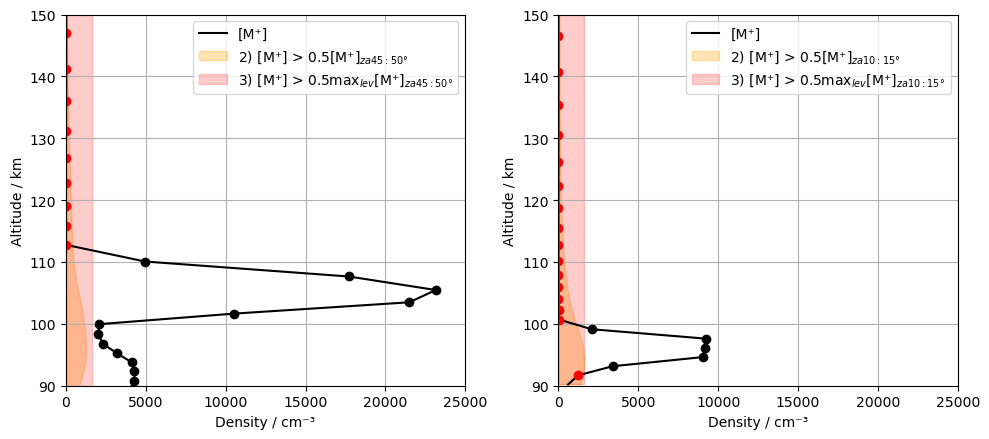

In [207]:
# Plotting code for the first subplot, 45-50' location 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel1)

# First subplot ==============================================================================

axes[0].plot(Mptdensns_sel2, alt_sel2, label='[M\u207A]', color='black')

#axes[0].plot((Mptdensns_sel2-Mptdens_nsavg_sel2), alt_sel2, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

#axes[0].fill_betweenx(alt_sel2, 0, 0*Mptdens_nsstd_sel2, color='green', alpha=0.2, label='1b) 0.25\u03C3$_{[M\u207A]}$')


# Set y-axis limits
axes[0].set_ylim(90, WACCM_UL)

axes[0].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel2, 0, 0.5 * Mptdens_sel2, color='orange', alpha=0.3, label=f'2) [M\u207A] > 0.5[M\u207A]$_{{za {int(intlat_sel2.values-2.5)}:{int(intlat_sel2.values+2.5)}\u00B0}}$')



# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel2, 0, 0.5*max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > 0.5max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2.values-2.5)}:{int(intlat_sel2.values+2.5)}\u00B0}}$')


for i in range(len(alt_sel2) - 1):
    if  Mptdensns_sel2[i] < 0.5*max_Mptdens_sel or Mptdensns_sel2[i] < 0.5 * Mptdens_sel2[i]:     #Mptdens_nsdiff_sel2[i] < 0.25*Mptdens_nsstd_sel2[i] or
        #axes[0].plot([Mptdensns_sel2[i], Mptdensns_sel2[i+1]], [alt_sel2[i], alt_sel2[i+1]], color='red')
        axes[0].plot(Mptdensns_sel2[i], alt_sel2[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel2[i], alt_sel2[i], 'ko')  # Plot black circles
    
axes[0].set_xlabel('Density / cm\u207B\u00B3')  
axes[0].set_ylabel('Altitude / km')
#axes[0].set_title(f'Lat=48.5\u00B0N, lon=45.0\u00B0E')
axes[0].legend()
axes[0].grid(True)

# Second subplot, 10-15' location =============================================================================

axes[1].plot(Mptdensns_sel1, alt_sel1, label='[M\u207A]', color='black')
#axes[1].plot((Mptdensns_sel1-Mptdens_nsavg_sel1), alt_sel1, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

#axes[1].fill_betweenx(alt_sel1, 0, 0.25*Mptdens_nsstd_sel1, color='green', alpha=0.2, label='1b) 0.25\u03C3$_{[M\u207A]}$')


# Set y-axis limits
axes[1].set_ylim(90, WACCM_UL)

axes[1].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel1, 0, 0.5 * Mptdens_sel1, color='orange', alpha=0.3, label=f'2) [M\u207A] > 0.5[M\u207A]$_{{za {int(intlat_sel1.values-2.5)}:{int(intlat_sel1.values+2.5)}\u00B0}}$')




# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel1, 0, 0.5*max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > 0.5max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1.values-2.5)}:{int(intlat_sel1.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel1) - 1):
    if Mptdensns_sel1[i] < 0.5*max_Mptdens_sel or Mptdensns_sel1[i] < 0.5 * Mptdens_sel1[i]:   #Mptdens_nsdiff_sel1[i] < 0.25*Mptdens_nsstd_sel1[i] or 
        #axes[1].plot([Mptdensns_sel1[i], Mptdensns_sel1[i+1]], [alt_sel1[i], alt_sel1[i+1]], color='red')
        axes[1].plot(Mptdensns_sel1[i], alt_sel1[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel1[i], alt_sel1[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')  
axes[1].set_ylabel('Altitude / km')
#axes[1].set_title(f'Lat=12.5\u00B0N, Lon=52.5\u00B0W')
          #Lat {int(intlat_sel1.values-2.5)}:{int(intlat_sel1.values+2.5)}\u00B0')
axes[1].legend()
axes[1].grid(True)


# ============================================================================================
plt.tight_layout()

figname = f'{run_name}_Criteria_eg_Lat_{int(intlat_sel2.values-2.5)}-{int(intlat_sel2.values+2.5)}_and_{int(intlat_sel1.values-2.5)}-{int(intlat_sel1.values+2.5)}.png'
plt.savefig(f'./Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

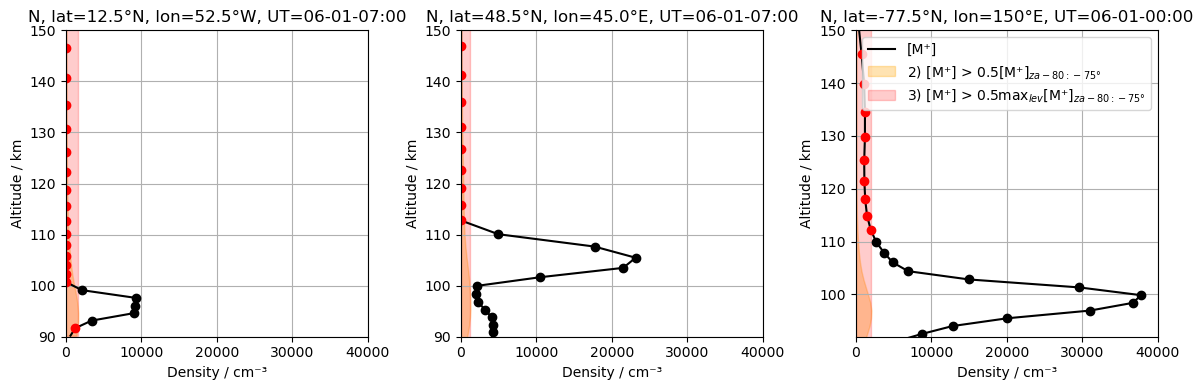

In [210]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# First subplot ==============================================================================

axes[1].plot(Mptdensns_sel2, alt_sel2, label='[M\u207A]', color='black')

# axes[1].plot((Mptdensns_sel2 - Mptdens_nsavg_sel2), alt_sel2, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

# axes[1].plot(0.5 * Mptdens_nsstd_sel2, alt_sel2, color='green', linestyle='dashed', label='1b) 0.5\u03C3$_{[M\u207A]}$')

# Set y-axis limits
axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel2, 0, 0.5 * Mptdens_sel2, color='orange', alpha=0.3, label=f'2) [M\u207A] > 0.5[M\u207A]$_{{za {int(intlat_sel2.values - 2.5)}:{int(intlat_sel2.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel2)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel2, 0, 0.5*max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > 0.5max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2.values - 2.5)}:{int(intlat_sel2.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel2) - 1):
    if Mptdensns_sel2[i] < 0.5*max_Mptdens_sel or Mptdensns_sel2[i] < 0.5 * Mptdens_sel2[i]:   #Mptdens_nsdiff_sel2[i] < 0.5 * Mptdens_nsstd_sel2[i] or 
        axes[1].plot(Mptdensns_sel2[i], alt_sel2[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel2[i], alt_sel2[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')
axes[1].set_ylabel('Altitude / km')
#axes[1].legend()
axes[1].grid(True)
axes[1].set_title('N, lat=48.5\u00b0N, lon=45.0\u00b0E, UT=06-01-07:00')

# Second subplot =============================================================================

axes[0].plot(Mptdensns_sel1, alt_sel1, label='[M\u207A]', color='black')
# axes[0].plot((Mptdensns_sel1 - Mptdens_nsavg_sel1), alt_sel1, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

# axes[0].plot(0.5 * Mptdens_nsstd_sel1, alt_sel1, color='green', linestyle='dashed', label='1b) 0.5\u03C3$_{[M\u207A]}$')

# Set y-axis limits
axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel1, 0, 0.5 * Mptdens_sel1, color='orange', alpha=0.3, label=f'2) [M\u207A] > 0.5[M\u207A]$_{{za {int(intlat_sel1.values - 2.5)}:{int(intlat_sel1.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel1)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel1, 0, 0.5*max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > 0.5max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1.values - 2.5)}:{int(intlat_sel1.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel1) - 1):
    if Mptdensns_sel1[i] < 0.5*max_Mptdens_sel or Mptdensns_sel1[i] < 0.5 * Mptdens_sel1[i]:  #Mptdens_nsdiff_sel1[i] < 0.5 * Mptdens_nsstd_sel1[i] or
        axes[0].plot(Mptdensns_sel1[i], alt_sel1[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel1[i], alt_sel1[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')
axes[0].set_ylabel('Altitude / km')
#axes[0].legend()
axes[0].grid(True)
axes[0].set_title('N, lat=12.5\u00b0N, lon=52.5\u00b0W, UT=06-01-07:00')

# Third subplot =============================================================================

axes[2].plot(Mptdensns_sel3, alt_sel3, label='[M\u207A]', color='black')
# axes[2].plot((Mptdensns_sel3 - Mptdens_nsavg_sel3), alt_sel3, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

# axes[2].plot(1 * Mptdens_nsstd_sel3, alt_sel3, color='green', linestyle='dashed', label='1b) \u03C3$_{[M\u207A]}$')

# Set y-axis limits
axes[2].set_ylim(92, WACCM_UL)
axes[2].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[2].fill_betweenx(alt_sel3, 0, 0.5 * Mptdens_sel3, color='orange', alpha=0.3, label=f'2) [M\u207A] > 0.5[M\u207A]$_{{za {int(intlat_sel3.values - 2.5)}:{int(intlat_sel3.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel = np.max(Mptdens_sel3)

# Add a vertical line at the maximum value
axes[2].fill_betweenx(alt_sel3, 0, 0.5*max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > 0.5max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel3.values - 2.5)}:{int(intlat_sel3.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel3) - 1):
    if Mptdensns_sel3[i] < 0.5*max_Mptdens_sel or Mptdensns_sel3[i] < 0.5 * Mptdens_sel3[i]:  #Mptdens_nsdiff_sel3[i] < 1 * Mptdens_nsstd_sel3[i] or
        axes[2].plot(Mptdensns_sel3[i], alt_sel3[i], 'ro')  # Plot red circles
    else:
        axes[2].plot(Mptdensns_sel3[i], alt_sel3[i], 'ko')  # Plot black circles

axes[2].set_xlabel('Density / cm\u207B\u00B3')
axes[2].set_ylabel('Altitude / km')
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('N, lat=-77.5\u00b0N, lon=150\u00b0E, UT=06-01-00:00')
# ============================================================================================
plt.tight_layout()

figname = f'{run_name}_Criteria_eg_Lat_{int(intlat_sel2.values - 2.5)}-{int(intlat_sel2.values + 2.5)}_and_{int(intlat_sel1.values - 2.5)}-{int(intlat_sel1.values + 2.5)}_and_{int(intlat_sel3.values - 2.5)}-{int(intlat_sel3.values + 2.5)}.png'
plt.savefig(f'./Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

# Lat Line Plots (non magnetic coords)

In [100]:
factor = 1  #factor to divide COSMIC data by for easier comparison

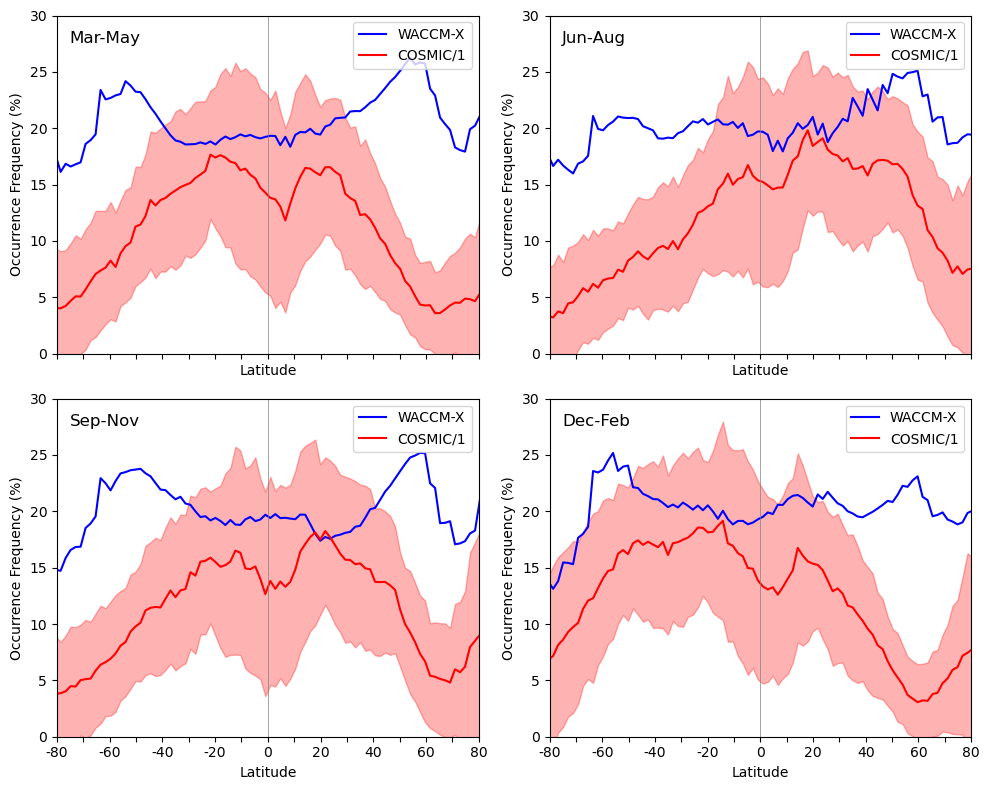

In [101]:
# Using COSMIC data on lat-(lon) grid
#======================================


# lat_values = np.arange(-90, 95, 5)
# lat_bin_edges = lat_values
# lat_bin_midpoints = (lat_bin_edges[:-1] + lat_bin_edges[1:]) / 2


# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot WACCM data
# axes[0, 0].plot(intlat, spr_SpEsns_Occ_Freq_lat_5deg , color='blue', label='WACCM-X')
# axes[0, 1].plot(intlat, sum_SpEsns_Occ_Freq_lat_5deg , color='blue', label='WACCM-X')
# axes[1, 0].plot(intlat, aut_SpEsns_Occ_Freq_lat_5deg , color='blue', label='WACCM-X')
# axes[1, 1].plot(intlat, win_SpEsns_Occ_Freq_lat_5deg , color='blue', label='WACCM-X')

axes[0, 0].plot(lat, spr_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='WACCM-X')
axes[0, 1].plot(lat, sum_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='WACCM-X')
axes[1, 0].plot(lat, aut_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='WACCM-X')
axes[1, 1].plot(lat, win_SpEsns_Occ_Freq_lat , color='blue', linestyle='solid', label='WACCM-X')


# Plot COSMIC data with shaded error area
axes[0, 0].plot(lat_spr_lon, ocfr_spr_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
axes[0, 1].plot(lat_sum_lon, ocfr_sum_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
axes[1, 0].plot(lat_aut_lon, ocfr_aut_lon_mean /factor, color='red', label=f'COSMIC/{factor}')
axes[1, 1].plot(lat_win_lon, ocfr_win_lon_mean /factor, color='red', label=f'COSMIC/{factor}')

# # Fill between upper and lower bounds of the error
axes[0, 0].fill_between(lat_spr_lon, (ocfr_spr_lon_mean.values - spr_stdev_lat.values) / factor, (ocfr_spr_lon_mean.values + spr_stdev_lat.values) / factor, color='red', alpha=0.3)
axes[0, 1].fill_between(lat_sum_lon, (ocfr_sum_lon_mean.values - sum_stdev_lat.values) / factor, (ocfr_sum_lon_mean.values + sum_stdev_lat.values) / factor, color='red', alpha=0.3)
axes[1, 0].fill_between(lat_aut_lon, (ocfr_aut_lon_mean.values - aut_stdev_lat.values) / factor, (ocfr_aut_lon_mean.values + aut_stdev_lat.values) / factor, color='red', alpha=0.3)
axes[1, 1].fill_between(lat_win_lon, (ocfr_win_lon_mean.values - win_stdev_lat.values) / factor, (ocfr_win_lon_mean.values + win_stdev_lat.values) / factor, color='red', alpha=0.3)



ylim_min = 0
ylim_max = 30

nmeas_lim = 25

#=============================================================================================
# Iterate through each subplot to add rectangles where nmeas_lonavg is less than XX
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        nmeas_lonavg = None
        if i == 0 and j == 0:
            nmeas_lonavg = nmeas_lonavg_spr
        elif i == 0 and j == 1:
            nmeas_lonavg = nmeas_lonavg_sum
        elif i == 1 and j == 0:
            nmeas_lonavg = nmeas_lonavg_aut
        elif i == 1 and j == 1:
            nmeas_lonavg = nmeas_lonavg_win
            
        mask = nmeas_lonavg < nmeas_lim
        lat_masked = lat[mask]
        
        # Find the indices where the condition is True
        indices = np.where(mask)[0]
        
        # Initialize variables to track the start and end points of each region
        start = None
        end = None
        
        # Iterate through the indices and identify consecutive regions where the condition is met
        for idx in indices:
            if start is None:
                start = idx
                end = idx
            elif idx == end + 1:
                end = idx
            else:
                # Fill the region between the start and end points
                min_lat_masked = np.min(lat[start:end+1])
                max_lat_masked = np.max(lat[start:end+1])
                ax.fill_betweenx([ylim_min, ylim_max], min_lat_masked, max_lat_masked, color='gray', alpha=0.9)
                start = idx
                end = idx
        
        # If there is a remaining region after iterating through all indices, fill it
        if start is not None and end is not None:
            min_lat_masked = np.min(lat[start:end+1])
            max_lat_masked = np.max(lat[start:end+1])
            ax.fill_betweenx([ylim_min, ylim_max], min_lat_masked, max_lat_masked, color='gray', alpha=0.9)
#=============================================================================================
            

# Set common labels and legend
for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency (%)')
    
    # ax.set_xticks(np.linspace(-90, 90, 7))
    # ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    ax.legend()
    #ax.set_ylim(0, 30)
    ax.set_ylim(ylim_min, ylim_max)

# Add text annotation to the top left
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

# Move the legend to the top right
axes[0, 0].legend(loc='upper right')
axes[0, 1].legend(loc='upper right')
axes[1, 0].legend(loc='upper right')
axes[1, 1].legend(loc='upper right')
        
# Adjust layout
plt.tight_layout()

# Save and show the figure
figname = None
if fivedegbins == 1:
    figname = f'{run_name}_Daviddata_Lat_5d_f-{factor}.png'
else:
    figname = f'{run_name}_Daviddata_Lat_f-{factor}.png'
    
plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


# Lat - Lon

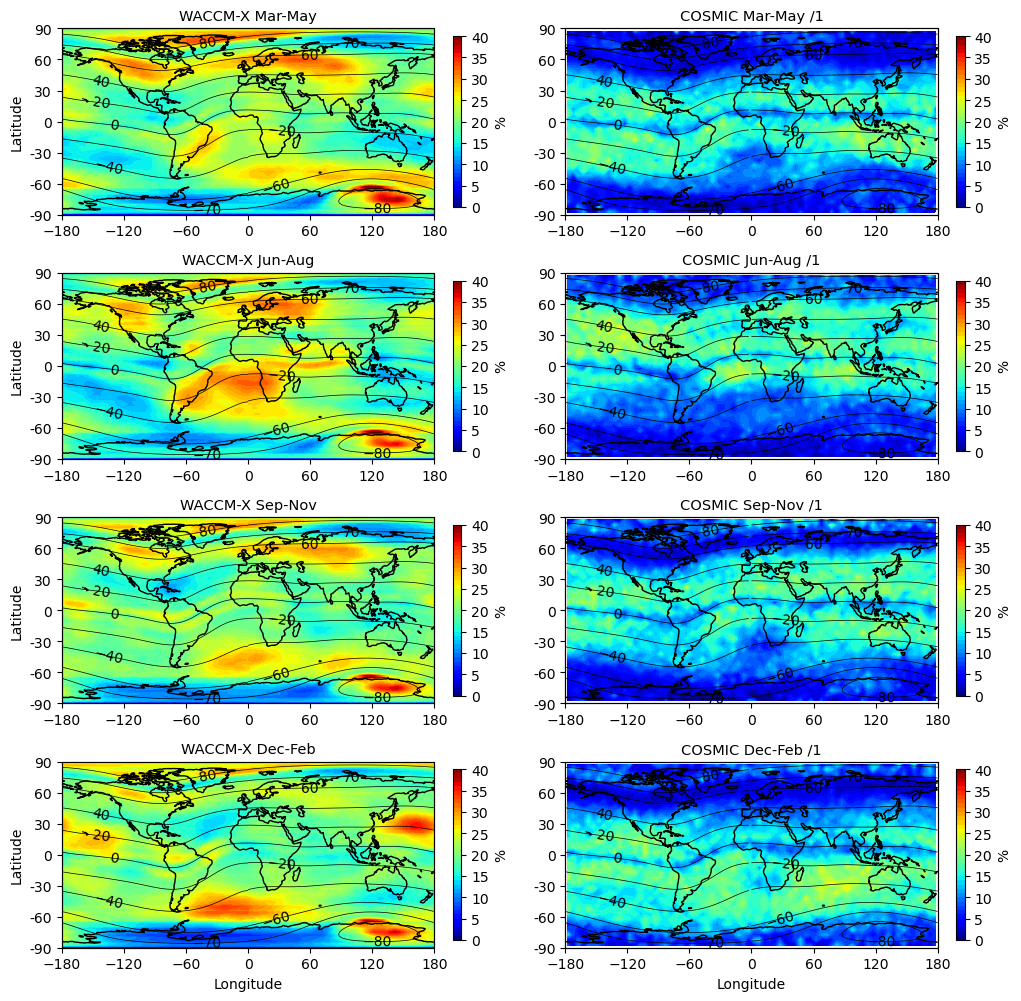

In [110]:
#WACCM
# Convert xarray Variable to NumPy array and set last value to 360
lon_plot = lon.values
lon_plot[-1] = 360.


# Create a 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11, 11),
                         sharex=True, sharey=True, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

cmap = plt.get_cmap('jet')

#Plot WACCM data in the first column

subplots_waccm = [spr_SpEsns_Occ_Freq_llav , sum_SpEsns_Occ_Freq_llav
                  , aut_SpEsns_Occ_Freq_llav, win_SpEsns_Occ_Freq_llav]

titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vminw = 0
vmaxw = 40
nolevsw = (vmaxw-vminw) +1

for i, data in enumerate(subplots_waccm):
    row_waccm = i
    col_waccm = 0
    
    ax_waccm = axes[i, 0]

    C = ax_waccm.contourf(lon_plot, lat, data, cmap=cmap,
                    levels=np.linspace(vminw, vmaxw, nolevsw), vmin=vminw, vmax=vmaxw
                         )

    
    if row_waccm == 3:
        ax_waccm.set_xlabel('Longitude')
    if col_waccm == 0:
        ax_waccm.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
 
    ax_waccm.set_ylabel('Latitude')
    ax_waccm.set_yticks(np.linspace(-90, 90, 7))
    ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        


    
    cbar = fig.colorbar(C, ax=ax_waccm, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_waccm.coastlines() 

    #ax.set_title(titles_waccm[i])

    # Add contour lines to each subplot individually
    ax2 = fig.add_subplot(axes[i, 0].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2.contour(lon, lat, ALATM[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels,# vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2.patch.set_facecolor('none')
    clabels = ax2.clabel(contour, inline=True, fontsize=10)
    ax2.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)



# Plot COSMIC data in the second column
subplots_cosmic = [ocfr_spr_lon, ocfr_sum_lon, ocfr_aut_lon, ocfr_win_lon]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vminc = 0
vmaxc = 40
nolevsc = (vmaxc-vminc) +1

for i, data in enumerate(subplots_cosmic):
    ax_cosmic = axes[i, 1]
    

    C = ax_cosmic.contourf(lon_spr_lon, lat_spr_lon, data/factor, cmap=cmap,
                    levels=np.linspace(vminc, vmaxc, nolevsc), vmin=vminc, vmax=vmaxc
                   )

    ax_cosmic.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    if i == 3:
        ax_cosmic.set_xlabel('Longitude')
    #if i == 0:
    ax_cosmic.set_yticks(np.linspace(-90, 90, 7))


    cbar = fig.colorbar(C, ax=ax_cosmic, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_cosmic.coastlines() 

    #ax.set_title(titles_cosmic[i])

    # Add contour lines to each subplot individually
    ax2_cosmic = fig.add_subplot(axes[i, 1].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2_cosmic.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2_cosmic.contour(ALon, ALat, ALATM[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels, vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2_cosmic.patch.set_facecolor('none')
    clabels = ax2_cosmic.clabel(contour, inline=True, fontsize=10)
    ax2_cosmic.set_title(f'COSMIC {titles_cosmic[i]} /{factor}', fontsize=10.5)




plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = None
if fivedegbins == 1:
    figname = f'{run_name}_Daviddata_LatLon_5d_f-{factor}.png'
else:
    figname = f'{run_name}_Daviddata_LatLon_f-{factor}.png'
    
plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT - all levs

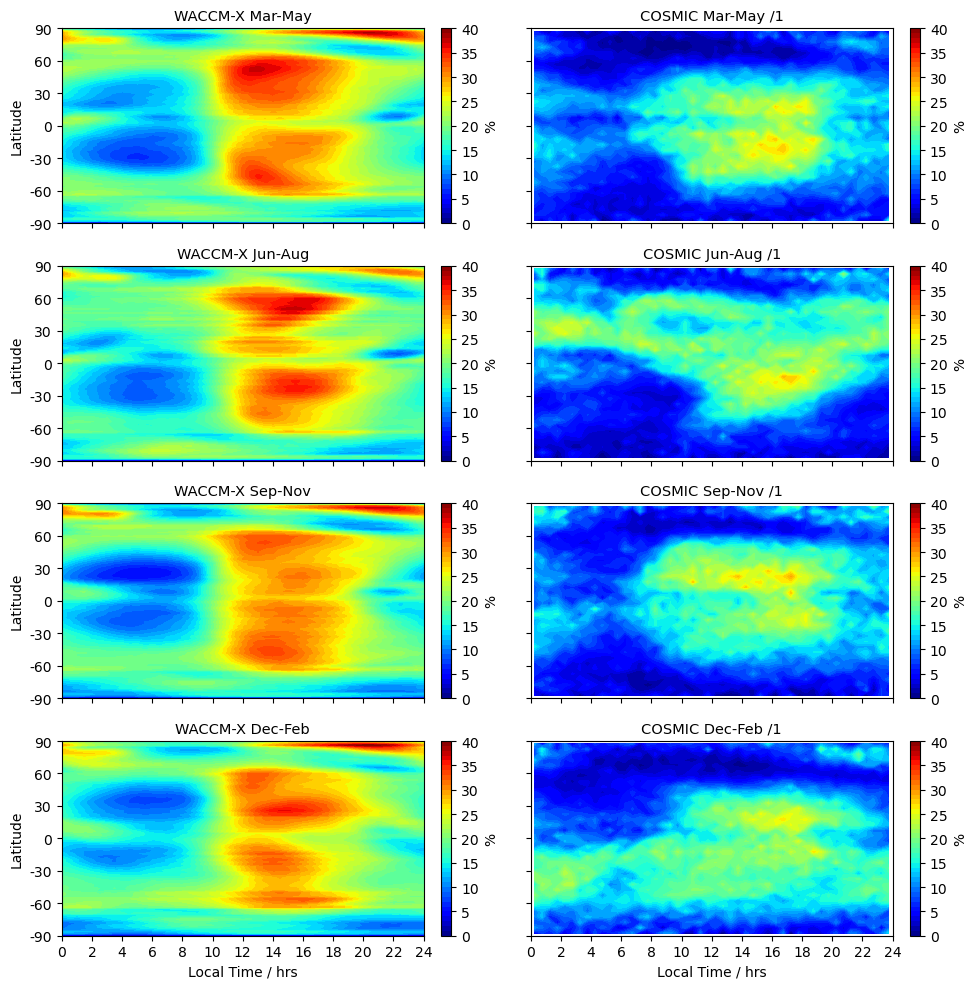

In [111]:
# Lat - LT - all levs

 #Whole Dataset avg over all heights (96, 48) lat,LT
win_SpEs_Occ_Freq_llbav_plot = np.concatenate((win_SpEs_Occ_Freq_llbav, win_SpEs_Occ_Freq_llbav[:, :1]), axis=1)
spr_SpEs_Occ_Freq_llbav_plot = np.concatenate((spr_SpEs_Occ_Freq_llbav, spr_SpEs_Occ_Freq_llbav[:, :1]), axis=1)
sum_SpEs_Occ_Freq_llbav_plot = np.concatenate((sum_SpEs_Occ_Freq_llbav, sum_SpEs_Occ_Freq_llbav[:, :1]), axis=1)
aut_SpEs_Occ_Freq_llbav_plot = np.concatenate((aut_SpEs_Occ_Freq_llbav, aut_SpEs_Occ_Freq_llbav[:, :1]), axis=1)


# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=4, ncols=2, figsize=(10, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 40
nolevs_cosmic = (vmax_cosmic - vmin_cosmic ) +1
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 40
nolevs_waccm = (vmax_waccm - vmin_waccm ) +1
cmap_waccm = plt.get_cmap('jet')



# WACCM Latitude - Local Time Plots
subplots_waccm = [spr_SpEs_Occ_Freq_llbav_plot, sum_SpEs_Occ_Freq_llbav_plot,
                  aut_SpEs_Occ_Freq_llbav_plot, win_SpEs_Occ_Freq_llbav_plot]

titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']


for i, data_waccm in enumerate(subplots_waccm):
    row_waccm = i
    col_waccm = 0
    ax_waccm = axes_combined[row_waccm, col_waccm]

    C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=jet,
                                levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                vmin=vmin_waccm, vmax=vmax_waccm
                               )

    if row_waccm == 3:
        ax_waccm.set_xlabel('Local Time / hrs')
    if col_waccm == 0:
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))  
    
    ax_waccm.set_ylabel('Latitude')
    ax_waccm.set_yticks(np.linspace(-90, 90, 7))
    ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
    ax_waccm.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)


    cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)#, shrink=0.8)
    cbar_waccm.set_label(r'%')

    #ax_waccm.set_title(titles_waccm[i])
    



# COSMIC Latitude - Local Time Plots
subplots_cosmic = [ocfr_spr_LT, ocfr_sum_LT, ocfr_aut_LT, ocfr_win_LT]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    row_cosmic = i
    col_cosmic = 1
    ax_cosmic = axes_combined[row_cosmic, col_cosmic]

    C_cosmic = ax_cosmic.contourf(LT_spr_LT, lat_spr_LT, data_cosmic/factor, cmap=jet,
                                  levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),vmin=vmin_cosmic, vmax=vmax_cosmic
                                 )

    if col_cosmic == 0:
        ax_cosmic.set_ylabel('Latitude')
    ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
    ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))   
    
    if row_cosmic == 3:
        ax_cosmic.set_xlabel('Local Time / hrs')
    xticks_cosmic = np.linspace(0, 24, 13)
    ax_cosmic.set_xticks(xticks_cosmic)
    ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
    
    ax_cosmic.set_title(f'COSMIC {titles_waccm[i]} /{factor}', fontsize=10.5)

    cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)#, shrink=0.8)
    cbar_cosmic.set_label(r'%')

    #ax_cosmic.set_title(titles_cosmic[i])


    

plt.tight_layout()#rect=[0.05, 0.03, 1, 0.95])

# Save the combined figure
figname = None
if fivedegbins == 1:
    figname = f'{run_name}_Daviddata_LatLT_5d_f-{factor}.png'
else:
    figname = f'{run_name}_Daviddata_LatLT_f-{factor}.png'
    
plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')


plt.show()


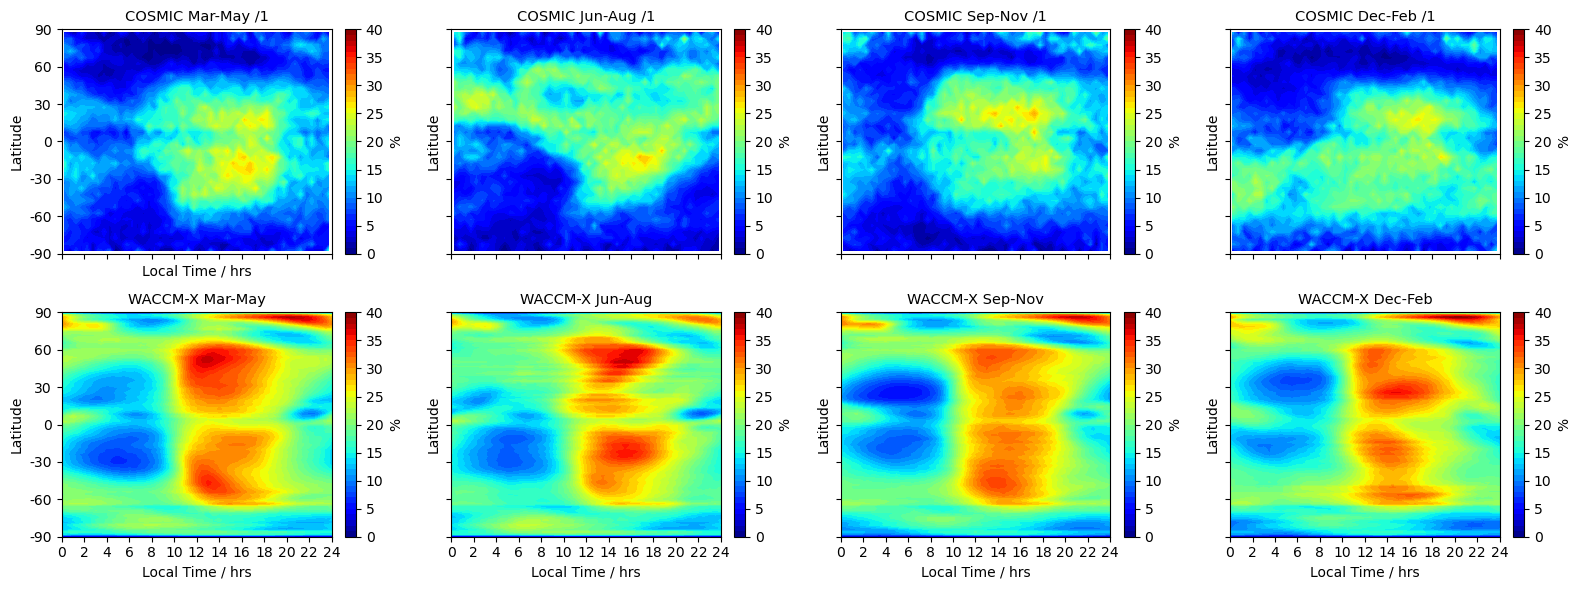

In [112]:
# Latitude - Local Time Plots
# Landscape 

fig_combined, axes_combined = plt.subplots(nrows=2, ncols=4, figsize=(16, 6),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 40
nolevs_cosmic = (vmax_cosmic - vmin_cosmic) + 1
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 40
nolevs_waccm = (vmax_waccm - vmin_waccm) + 1
cmap_waccm = plt.get_cmap('jet')

# COSMIC Latitude - Local Time Plots
subplots_cosmic = [ocfr_spr_LT, ocfr_sum_LT, ocfr_aut_LT, ocfr_win_LT]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    row_cosmic = 0
    col_cosmic = i
    ax_cosmic = axes_combined[row_cosmic, col_cosmic]

    C_cosmic = ax_cosmic.contourf(LT_spr_LT, lat_spr_LT, data_cosmic / factor, cmap=jet,
                                   levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),
                                   vmin=vmin_cosmic, vmax=vmax_cosmic
                                   )

    if row_cosmic == 0:
        ax_cosmic.set_ylabel('Latitude')
    ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
    ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

    if col_cosmic == 0:
        ax_cosmic.set_xlabel('Local Time / hrs')
    xticks_cosmic = np.linspace(0, 24, 13)
    ax_cosmic.set_xticks(xticks_cosmic)
    ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))

    ax_cosmic.set_title(f'COSMIC {titles_cosmic[i]} /{factor}', fontsize=10.5)

    cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)  # , shrink=0.8)
    cbar_cosmic.set_label(r'%')

# WACCM Latitude - Local Time Plots
subplots_waccm = [spr_SpEs_Occ_Freq_llbav_plot, sum_SpEs_Occ_Freq_llbav_plot,
                  aut_SpEs_Occ_Freq_llbav_plot, win_SpEs_Occ_Freq_llbav_plot]

titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_waccm in enumerate(subplots_waccm):
    row_waccm = 1
    col_waccm = i
    ax_waccm = axes_combined[row_waccm, col_waccm]

    C_waccm = ax_waccm.contourf(timeplot, lat, data_waccm, cmap=jet,
                                 levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),
                                 vmin=vmin_waccm, vmax=vmax_waccm
                                 )

    if row_waccm == 1:
        ax_waccm.set_xlabel('Local Time / hrs')
    if col_waccm == 0:
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))

    ax_waccm.set_ylabel('Latitude')
    ax_waccm.set_yticks(np.linspace(-90, 90, 7))
    ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

    ax_waccm.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)

    cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)  # , shrink=0.8)
    cbar_waccm.set_label(r'%')

plt.tight_layout()  # rect=[0.05, 0.03, 1, 0.95])

# Save the combined figure
figname = None
if fivedegbins == 1:
    figname = f'{run_name}_Daviddata_LatLT_5d_f-{factor}_landscape.png'
else:
    figname = f'{run_name}_Daviddata_LatLT_f-{factor}_landscape.png'

plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Alt - Lat

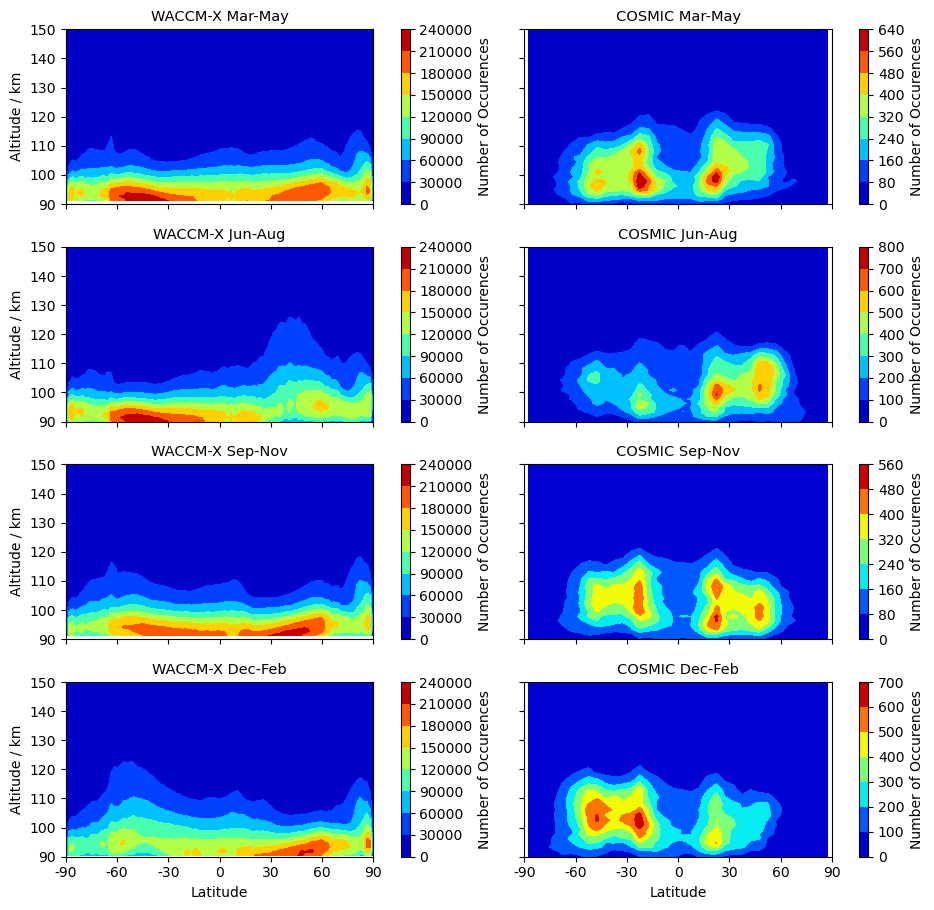

In [114]:
# Plotting number of occurences rather than occurence frequency, since no altitude information available if there is no Es layer present

# Define common parameters
vmin_cosmic = 0
vmax_cosmic = 32
nolevs_cosmic = (vmax_cosmic - vmin_cosmic )+ 1

vmin_waccm = 0
vmax_waccm = 12
nolevs_waccm = (vmax_waccm - vmin_waccm )+ 1 

cmap = plt.get_cmap('jet')

# Create a 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



subplots_waccm = [SpEs_spr_alt_lat, SpEs_sum_alt_lat, SpEs_aut_alt_lat, SpEs_win_alt_lat]    #tot_SpEsns_spr
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]


titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_waccm in enumerate(subplots_waccm):
    ax = axes[i, 0]

    alts_plot = alts_waccm[i]
    
    C = ax.contourf(lat, alts_plot, data_waccm, cmap=cmap, 
                  #  levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate WACCM plots

    ax.set_ylabel('Altitude / km')

    #ax.set_ylim(alts_plot.min(), alts_plot.max())

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)
    
    
# Plot COSMIC data on the right
subplots_cosmic = [n_spr_altlat, n_sum_altlat, n_aut_altlat, n_win_altlat]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    ax = axes[i, 1]

    C = ax.contourf(lat_spr_altlatLT, alt_spr_altlatLT, data_cosmic, cmap=cmap,
                  #  levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic), vmin=vmin_cosmic, vmax=vmax_cosmic
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate COSMIC plots

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'COSMIC {titles_cosmic[i]}', fontsize=10.5)
    
ax.set_ylim(90,150)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = f'{run_name}_Daviddata_AltLat.png'
plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


In [115]:
# WACCM data normalisation

# Create DataArrays with the 'season' coordinate
SpEs_spr_alt_lat = xr.DataArray(SpEs_spr_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_alt_lat = xr.DataArray(SpEs_sum_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_alt_lat = xr.DataArray(SpEs_aut_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_alt_lat = xr.DataArray(SpEs_win_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

# Concatenate along the new 'season' dimension
combined = xr.concat([SpEs_spr_alt_lat, SpEs_sum_alt_lat, SpEs_aut_alt_lat, SpEs_win_alt_lat], dim='season')

# Calculate the overall min and max values
overall_min = combined.min(dim=['season', 'lev_sl', 'lat'])
overall_max = combined.max(dim=['season', 'lev_sl', 'lat'])

# Normalize each season's data using the overall min and max values
SpEs_spr_alt_lat_norm = (SpEs_spr_alt_lat - overall_min) / (overall_max - overall_min)
SpEs_sum_alt_lat_norm = (SpEs_sum_alt_lat - overall_min) / (overall_max - overall_min)
SpEs_aut_alt_lat_norm = (SpEs_aut_alt_lat - overall_min) / (overall_max - overall_min)
SpEs_win_alt_lat_norm = (SpEs_win_alt_lat - overall_min) / (overall_max - overall_min)





# # COSMIC data normalisation

n_spr_altlat = xr.DataArray(n_spr_altlat, dims=('altitude', 'latitude'), coords={'season': 'spring'})
n_sum_altlat = xr.DataArray(n_sum_altlat, dims=('altitude', 'latitude'), coords={'season': 'summer'})
n_aut_altlat = xr.DataArray(n_aut_altlat, dims=('altitude', 'latitude'), coords={'season': 'autumn'})
n_win_altlat = xr.DataArray(n_win_altlat, dims=('altitude', 'latitude'), coords={'season': 'winter'})

# Concatenate along the new 'season' dimension
combined = xr.concat([n_spr_altlat, n_sum_altlat, n_aut_altlat, n_win_altlat], dim='season')

# Calculate the overall min and max values
# overall_min = combined.min(dim=['season', 'lev_sl', 'lat'])
# overall_max = combined.max(dim=['season', 'lev_sl', 'lat'])
overall_min = combined.min(dim=['season', 'altitude', 'latitude'])
overall_max = combined.max(dim=['season', 'altitude', 'latitude'])

# Normalize each season's data using the overall min and max values
n_spr_altlat_norm = (n_spr_altlat - overall_min) / (overall_max - overall_min)
n_sum_altlat_norm = (n_sum_altlat - overall_min) / (overall_max - overall_min)
n_aut_altlat_norm = (n_aut_altlat - overall_min) / (overall_max - overall_min)
n_win_altlat_norm = (n_win_altlat - overall_min) / (overall_max - overall_min)



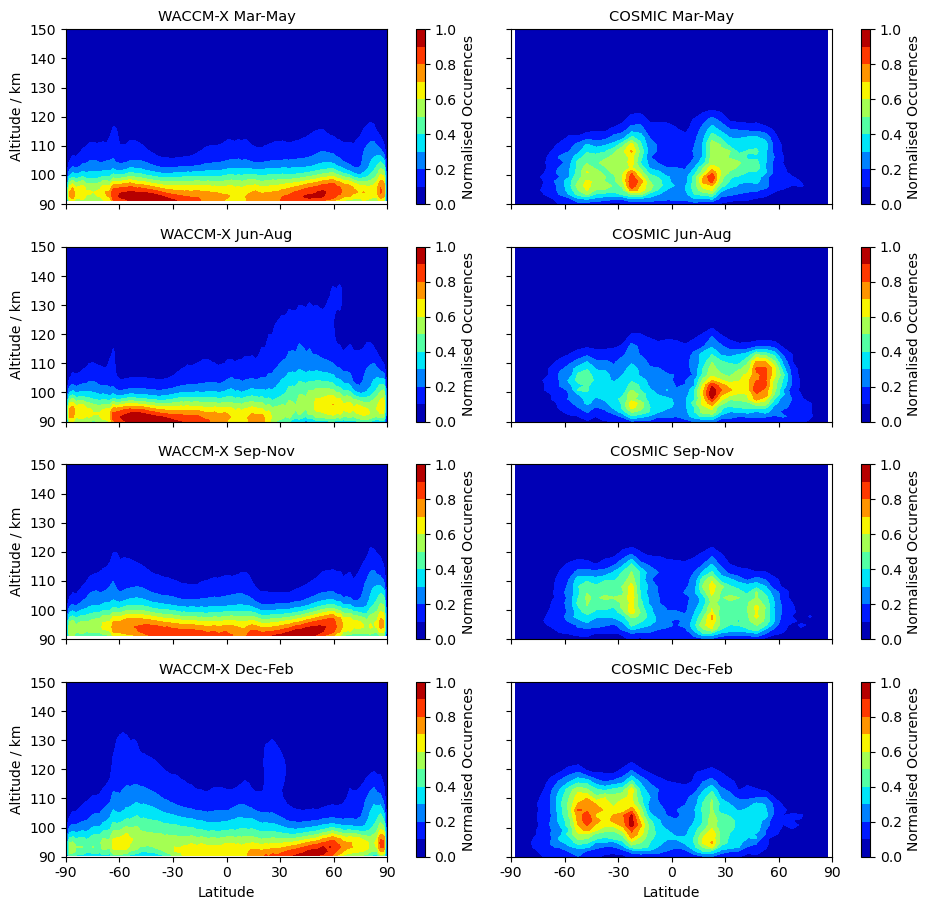

In [116]:
# Plotting NORMALISED number of occurences, so each of COSMIC and WACCM datasets are normalised to themselves (max/min values)


# Define common parameters
vmin_cosmic = 0
vmax_cosmic = 1 #32
nolevs_cosmic = 11 #(vmax_cosmic - vmin_cosmic )+ 1

vmin_waccm = 0
vmax_waccm = 1 #12
nolevs_waccm = 11 #(vmax_waccm - vmin_waccm )+ 1 

cmap = plt.get_cmap('jet')

# Create a 4x2 subplot grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



subplots_waccm = [SpEs_spr_alt_lat_norm, SpEs_sum_alt_lat_norm, SpEs_aut_alt_lat_norm, SpEs_win_alt_lat_norm]    #tot_SpEsns_spr
alts_waccm = [altavg_sl_spr, altavg_sl_sum, altavg_sl_aut, altavg_sl_win]


titles_waccm = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_waccm in enumerate(subplots_waccm):
    ax = axes[i, 0]

    alts_plot = alts_waccm[i]
    
    C = ax.contourf(lat, alts_plot, data_waccm, cmap=cmap, 
                    levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate WACCM plots

    ax.set_ylabel('Altitude / km')

    #ax.set_ylim(alts_plot.min(), alts_plot.max())

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Normalised Occurences')

    ax.set_title(f'WACCM-X {titles_waccm[i]}', fontsize=10.5)
    
    
# Plot COSMIC data on the right
subplots_cosmic = [n_spr_altlat_norm, n_sum_altlat_norm, n_aut_altlat_norm, n_win_altlat_norm]
titles_cosmic = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cosmic in enumerate(subplots_cosmic):
    ax = axes[i, 1]

    C = ax.contourf(lat_spr_altlatLT, alt_spr_altlatLT, data_cosmic, cmap=cmap,
                    levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic), vmin=vmin_cosmic, vmax=vmax_cosmic
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate COSMIC plots

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Normalised Occurences')

    ax.set_title(f'COSMIC {titles_cosmic[i]}', fontsize=10.5)
    
ax.set_ylim(90,150)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = f'{run_name}_Daviddata_AltLat_norm.png'
plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Alt - LT

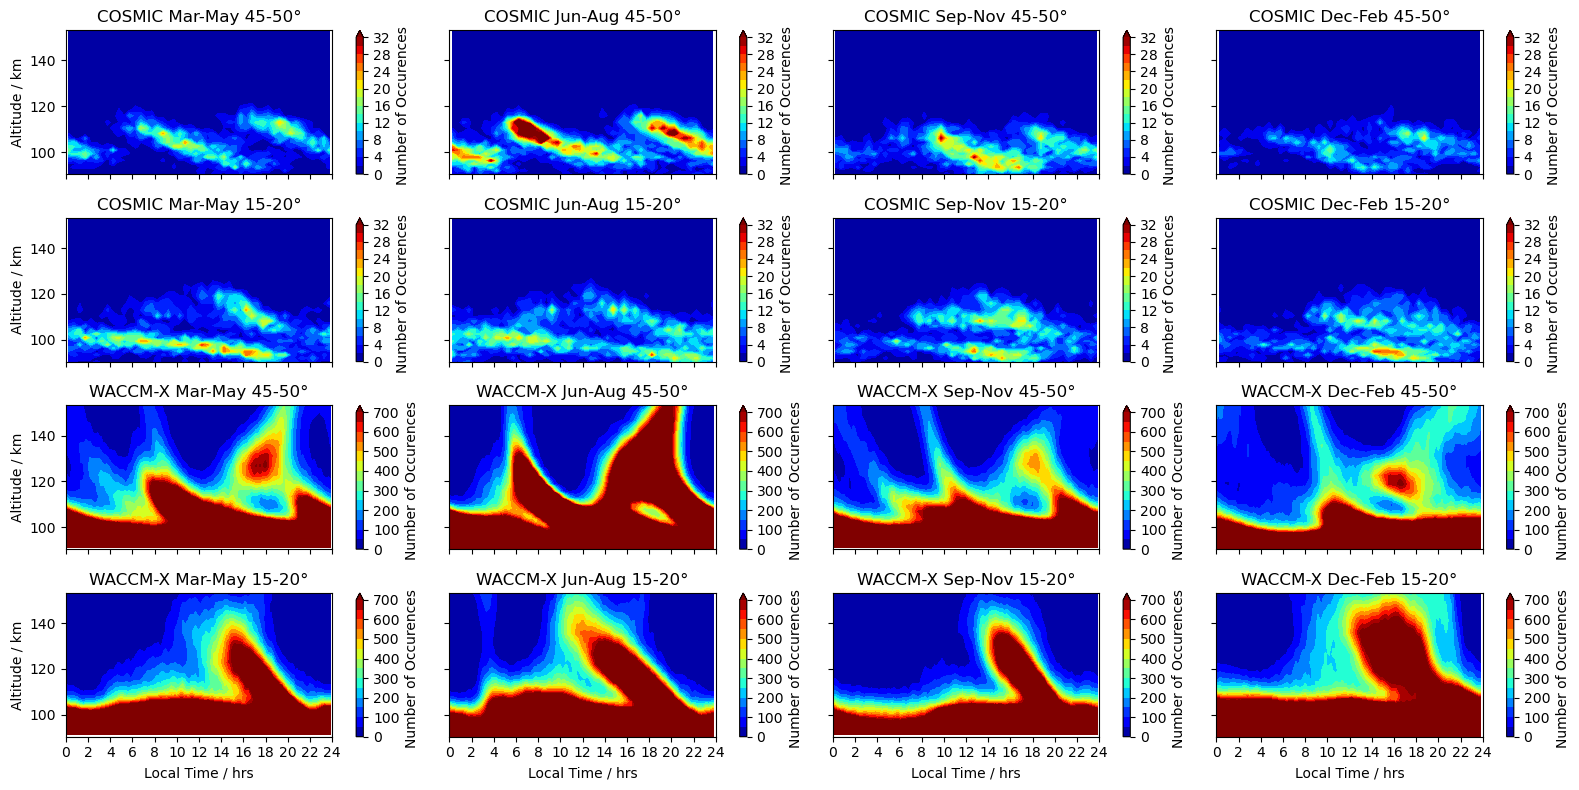

In [117]:
#Alt-LT plots, individual Lat slices
# WORKS FOR 5deg lat bins ONLY


###------------------------### C O S M I C ###------------------------###



# Define the latitude slices
#latitude_slices = [(10, 15), (20, 25), (30, 35), (40, 45), (50, 55)]
latitude_slices = [(15, 20) , (45, 50) ]
lenlat = len(latitude_slices)

# Create new variables for each season and latitude slice
spr_n_LT_latsl = {}
sum_n_LT_latsl = {}
aut_n_LT_latsl = {}
win_n_LT_latsl = {}

# Loop through each latitude slice
for lat_slice in latitude_slices:
    lower_lat, upper_lat = lat_slice
    
    # Slice the data for the current latitude slice
    spr_slice = np.squeeze( n_spr_altlatLT.sel(latitude=slice(lower_lat, upper_lat)) )
    sum_slice = np.squeeze( n_sum_altlatLT.sel(latitude=slice(lower_lat, upper_lat)) )
    aut_slice = np.squeeze( n_aut_altlatLT.sel(latitude=slice(lower_lat, upper_lat)) )
    win_slice = np.squeeze( n_win_altlatLT.sel(latitude=slice(lower_lat, upper_lat)) )
    
    # Store the results in dictionaries
    spr_n_LT_latsl[f'{lower_lat}-{upper_lat}'] = spr_slice
    sum_n_LT_latsl[f'{lower_lat}-{upper_lat}'] = sum_slice
    aut_n_LT_latsl[f'{lower_lat}-{upper_lat}'] = aut_slice
    win_n_LT_latsl[f'{lower_lat}-{upper_lat}'] = win_slice

###------------------------### W A C C M ###------------------------###
ind_latsls = {}

sl_tot_SpEs_spr_5deg = {}
sl_tot_SpEs_sum_5deg = {}
sl_tot_SpEs_aut_5deg = {}
sl_tot_SpEs_win_5deg = {}

plot_lowaltlim = 0.

for lat_slice in latitude_slices:
    lower_lat, upper_lat = lat_slice
    
    indices = np.where((intlat >= lower_lat) & (intlat <= upper_lat))[0]

    ind_latsls[f'{lower_lat}-{upper_lat}'] = indices[0]

    sl_tot_SpEs_spr_5deg[f'{lower_lat}-{upper_lat}'] = tot_SpEs_spr_5deg[:, indices, :]
    sl_tot_SpEs_sum_5deg[f'{lower_lat}-{upper_lat}'] = tot_SpEs_sum_5deg[:, indices, :]
    sl_tot_SpEs_aut_5deg[f'{lower_lat}-{upper_lat}'] = tot_SpEs_aut_5deg[:, indices, :]
    sl_tot_SpEs_win_5deg[f'{lower_lat}-{upper_lat}'] = tot_SpEs_win_5deg[:, indices, :]

timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

###-----------------------------------------------------------------###


# Define the seasons and titles
seasons = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
lenseas = len(seasons)

#set common colorbar properties
vmin_waccm = 0
vmax_waccm = 700
nolevs_waccm = 15

vmin_cosmic = 0
vmax_cosmic = 32
nolevs_cosmic = 17
cmap = plt.get_cmap('jet')


# Create a 4x4 subplot grid
fig, axes = plt.subplots(nrows=lenlat*2, ncols=lenseas, figsize=( (4*lenseas), (4*lenlat) ), sharex=True, sharey=True)


#################################### COSMIC PLOTS ######################################   
for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices[::-1]):
        
        if i_lat_band < lenlat:
            # Extract data for the top rows
            if season.lower() == 'mar-may':
                data = spr_n_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'jun-aug':
                data = sum_n_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'sep-nov':
                data = aut_n_LT_latsl[f'{lower_lat}-{upper_lat}']
            elif season.lower() == 'dec-feb':
                data = win_n_LT_latsl[f'{lower_lat}-{upper_lat}']

        # Create subplots for each season and latitude band
        ax = axes[i_lat_band, i_season]

        if i_lat_band < lenlat: 
            contour = ax.contourf(LT_spr_altlatLT, alt_spr_altlatLT, data, cmap='jet',
                                  levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic), vmin=vmin_cosmic, vmax=vmax_cosmic,
                                  extend='max'
                                 )

        cbar = fig.colorbar(contour, ax=ax, pad=0.07)
        cbar.set_label(r'Number of Occurences')
        ax.set_title(f'COSMIC {season} {lower_lat}-{upper_lat}\u00b0')
        
        if i_season == 0:
            ax.set_ylabel('Altitude / km')
            
#################################### WACCM PLOTS ######################################            
for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices[::-1]):
        
        i_lat_ind = i_lat_band + lenlat
        
        #intlat_ind = np.where((intlat >= lower_lat) & (intlat <= upper_lat))[0]
        
        if i_lat_ind > (lenlat-1):
            if season.lower() == 'mar-may':
                data_waccm = np.squeeze(sl_tot_SpEs_spr_5deg[f'{lower_lat}-{upper_lat}'])
                plot_alt = altavg_sl_spr
            elif season.lower() == 'jun-aug':
                data_waccm = np.squeeze(sl_tot_SpEs_sum_5deg[f'{lower_lat}-{upper_lat}'])
                plot_alt = altavg_sl_sum
            elif season.lower() == 'sep-nov':
                data_waccm = np.squeeze(sl_tot_SpEs_aut_5deg[f'{lower_lat}-{upper_lat}'])
                plot_alt = altavg_sl_aut
            elif season.lower() == 'dec-feb':
                data_waccm = np.squeeze(sl_tot_SpEs_win_5deg[f'{lower_lat}-{upper_lat}'])
                plot_alt = altavg_sl_win
                
  
        ax = axes[i_lat_ind, i_season]

        #if i_lat_ind > 1:
        contour = ax.contourf(timeplot_144, plot_alt, data_waccm, cmap=cmap, 
                              extend='max',
                              levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm
                             )
            
               
                
        if i_lat_band == 1:
            ax.set_xlabel('Local Time / hrs')
        xticks = np.linspace(0, 24, 13)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks.astype(int))
        ax.set_title(f'WACCM-X {season} {lower_lat}-{upper_lat}\u00b0')

        cbar = fig.colorbar(contour, ax=ax, pad=0.07)
        cbar.set_label(r'Number of Occurences')
        
        ax.set_ylim(plot_alt[-1], plot_alt[0])
        
        if i_season == 0:
            ax.set_ylabel('Altitude / km')
    
#################################### WACCM PLOTS ######################################

plt.tight_layout()

# Save the figure
figname = None
if fivedegbins == 1:
    figname = f'{run_name}_Daviddata_AltLT_5d.png'
else:
    figname = f'{run_name}_Daviddata_AltLT.png'
    
plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

In [118]:
#============================
# WACCM data normalisation
#============================

#-------------------------------------------------------------------------------------------------------------------------------------------
ind_15_20 = np.where((intlat >= 15) & (intlat <= 20))[0]

SpEs_spr_15_20 = np.squeeze(tot_SpEs_spr_5deg[:, ind_15_20, :])    #(19, 144)
SpEs_sum_15_20 = np.squeeze(tot_SpEs_sum_5deg[:, ind_15_20, :])
SpEs_aut_15_20 = np.squeeze(tot_SpEs_aut_5deg[:, ind_15_20, :])
SpEs_win_15_20 = np.squeeze(tot_SpEs_win_5deg[:, ind_15_20, :])

SpEs_spr_altLT_15_20 = xr.DataArray(SpEs_spr_15_20, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_15_20 = xr.DataArray(SpEs_sum_15_20, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_15_20 = xr.DataArray(SpEs_aut_15_20, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_15_20 = xr.DataArray(SpEs_win_15_20, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_15_20 = xr.concat([SpEs_spr_altLT_15_20, SpEs_sum_altLT_15_20, SpEs_aut_altLT_15_20, SpEs_win_altLT_15_20], dim='season')

overall_min_15_20 = combined_15_20.min(dim=['season', 'lev_sl', 'LT'])
overall_max_15_20 = combined_15_20.max(dim=['season', 'lev_sl', 'LT'])

# Normalize each season's data using the overall min and max values
SpEs_spr_altLT_15_20_norm = (SpEs_spr_altLT_15_20 - overall_min_15_20) / (overall_max_15_20 - overall_min_15_20)
SpEs_sum_altLT_15_20_norm = (SpEs_sum_altLT_15_20 - overall_min_15_20) / (overall_max_15_20 - overall_min_15_20)
SpEs_aut_altLT_15_20_norm = (SpEs_aut_altLT_15_20 - overall_min_15_20) / (overall_max_15_20 - overall_min_15_20)
SpEs_win_altLT_15_20_norm = (SpEs_win_altLT_15_20 - overall_min_15_20) / (overall_max_15_20 - overall_min_15_20)

#-------------------------------------------------------------------------------------------------------------------------------------------

ind_45_50 = np.where((intlat >= 45) & (intlat <= 50))[0]

SpEs_spr_45_50 = np.squeeze(tot_SpEs_spr_5deg[:, ind_45_50, :])
SpEs_sum_45_50 = np.squeeze(tot_SpEs_sum_5deg[:, ind_45_50, :])
SpEs_aut_45_50 = np.squeeze(tot_SpEs_aut_5deg[:, ind_45_50, :])
SpEs_win_45_50 = np.squeeze(tot_SpEs_win_5deg[:, ind_45_50, :])

SpEs_spr_altLT_45_50 = xr.DataArray(SpEs_spr_45_50, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_45_50 = xr.DataArray(SpEs_sum_45_50, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_45_50 = xr.DataArray(SpEs_aut_45_50, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_45_50 = xr.DataArray(SpEs_win_45_50, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_45_50 = xr.concat([SpEs_spr_altLT_45_50, SpEs_sum_altLT_45_50, SpEs_aut_altLT_45_50, SpEs_win_altLT_45_50], dim='season')

overall_min_45_50 = combined_45_50.min(dim=['season', 'lev_sl', 'LT'])
overall_max_45_50 = combined_45_50.max(dim=['season', 'lev_sl', 'LT'])

# Normalize each season's data using the overall min and max values
SpEs_spr_altLT_45_50_norm = (SpEs_spr_altLT_45_50 - overall_min_45_50) / (overall_max_45_50 - overall_min_45_50)
SpEs_sum_altLT_45_50_norm = (SpEs_sum_altLT_45_50 - overall_min_45_50) / (overall_max_45_50 - overall_min_45_50)
SpEs_aut_altLT_45_50_norm = (SpEs_aut_altLT_45_50 - overall_min_45_50) / (overall_max_45_50 - overall_min_45_50)
SpEs_win_altLT_45_50_norm = (SpEs_win_altLT_45_50 - overall_min_45_50) / (overall_max_45_50 - overall_min_45_50)
#-------------------------------------------------------------------------------------------------------------------------------------------

In [119]:
#============================
# # COSMIC data normalisation
#============================

#-------------------------------------------------------------------------------------------------------------------------------------------
SpEs_c_spr_15_20 = np.squeeze(n_spr_altlatLT[:, ind_15_20, :])  #(37, 48) alt, LT
SpEs_c_sum_15_20 = np.squeeze(n_sum_altlatLT[:, ind_15_20, :])
SpEs_c_aut_15_20 = np.squeeze(n_aut_altlatLT[:, ind_15_20, :])
SpEs_c_win_15_20 = np.squeeze(n_win_altlatLT[:, ind_15_20, :])

SpEs_c_spr_altLT_15_20 = xr.DataArray(SpEs_c_spr_15_20, dims=('alt', 'LT'), coords={'season': 'spring'})
SpEs_c_sum_altLT_15_20 = xr.DataArray(SpEs_c_sum_15_20, dims=('alt', 'LT'), coords={'season': 'summer'})
SpEs_c_aut_altLT_15_20 = xr.DataArray(SpEs_c_aut_15_20, dims=('alt', 'LT'), coords={'season': 'autumn'})
SpEs_c_win_altLT_15_20 = xr.DataArray(SpEs_c_win_15_20, dims=('alt', 'LT'), coords={'season': 'winter'})

combined_c_15_20 = xr.concat([SpEs_c_spr_altLT_15_20, SpEs_c_sum_altLT_15_20, SpEs_c_aut_altLT_15_20, SpEs_c_win_altLT_15_20], dim='season')

# Calculate overall min and max for the new set of variables
overall_min_c_15_20 = combined_c_15_20.min(dim=['season', 'alt', 'LT'])
overall_max_c_15_20 = combined_c_15_20.max(dim=['season', 'alt', 'LT'])

# Normalize each season's data using the overall min and max values for the new set of variables
SpEs_c_spr_altLT_15_20_norm = (SpEs_c_spr_altLT_15_20 - overall_min_c_15_20) / (overall_max_c_15_20 - overall_min_c_15_20)
SpEs_c_sum_altLT_15_20_norm = (SpEs_c_sum_altLT_15_20 - overall_min_c_15_20) / (overall_max_c_15_20 - overall_min_c_15_20)
SpEs_c_aut_altLT_15_20_norm = (SpEs_c_aut_altLT_15_20 - overall_min_c_15_20) / (overall_max_c_15_20 - overall_min_c_15_20)
SpEs_c_win_altLT_15_20_norm = (SpEs_c_win_altLT_15_20 - overall_min_c_15_20) / (overall_max_c_15_20 - overall_min_c_15_20)

#-------------------------------------------------------------------------------------------------------------------------------------------

# Extract seasonal data for the new set of variables with range 45-50
SpEs_c_spr_45_50 = np.squeeze(n_spr_altlatLT[:, ind_45_50, :])  #(37, 48) alt, LT
SpEs_c_sum_45_50 = np.squeeze(n_sum_altlatLT[:, ind_45_50, :])
SpEs_c_aut_45_50 = np.squeeze(n_aut_altlatLT[:, ind_45_50, :])
SpEs_c_win_45_50 = np.squeeze(n_win_altlatLT[:, ind_45_50, :])

# Create DataArrays for the new set of variables with range 45-50
SpEs_c_spr_altLT_45_50 = xr.DataArray(SpEs_c_spr_45_50, dims=('alt', 'LT'), coords={'season': 'spring'})
SpEs_c_sum_altLT_45_50 = xr.DataArray(SpEs_c_sum_45_50, dims=('alt', 'LT'), coords={'season': 'summer'})
SpEs_c_aut_altLT_45_50 = xr.DataArray(SpEs_c_aut_45_50, dims=('alt', 'LT'), coords={'season': 'autumn'})
SpEs_c_win_altLT_45_50 = xr.DataArray(SpEs_c_win_45_50, dims=('alt', 'LT'), coords={'season': 'winter'})

# Concatenate the new set of DataArrays with range 45-50
combined_c_45_50 = xr.concat([SpEs_c_spr_altLT_45_50, SpEs_c_sum_altLT_45_50, SpEs_c_aut_altLT_45_50, SpEs_c_win_altLT_45_50], dim='season')

# Calculate overall min and max for the new set of variables with range 45-50
overall_min_c_45_50 = combined_c_45_50.min(dim=['season', 'alt', 'LT'])
overall_max_c_45_50 = combined_c_45_50.max(dim=['season', 'alt', 'LT'])

# Normalize each season's data using the overall min and max values for the new set of variables with range 45-50
SpEs_c_spr_altLT_45_50_norm = (SpEs_c_spr_altLT_45_50 - overall_min_c_45_50) / (overall_max_c_45_50 - overall_min_c_45_50)
SpEs_c_sum_altLT_45_50_norm = (SpEs_c_sum_altLT_45_50 - overall_min_c_45_50) / (overall_max_c_45_50 - overall_min_c_45_50)
SpEs_c_aut_altLT_45_50_norm = (SpEs_c_aut_altLT_45_50 - overall_min_c_45_50) / (overall_max_c_45_50 - overall_min_c_45_50)
SpEs_c_win_altLT_45_50_norm = (SpEs_c_win_altLT_45_50 - overall_min_c_45_50) / (overall_max_c_45_50 - overall_min_c_45_50)

#-------------------------------------------------------------------------------------------------------------------------------------------

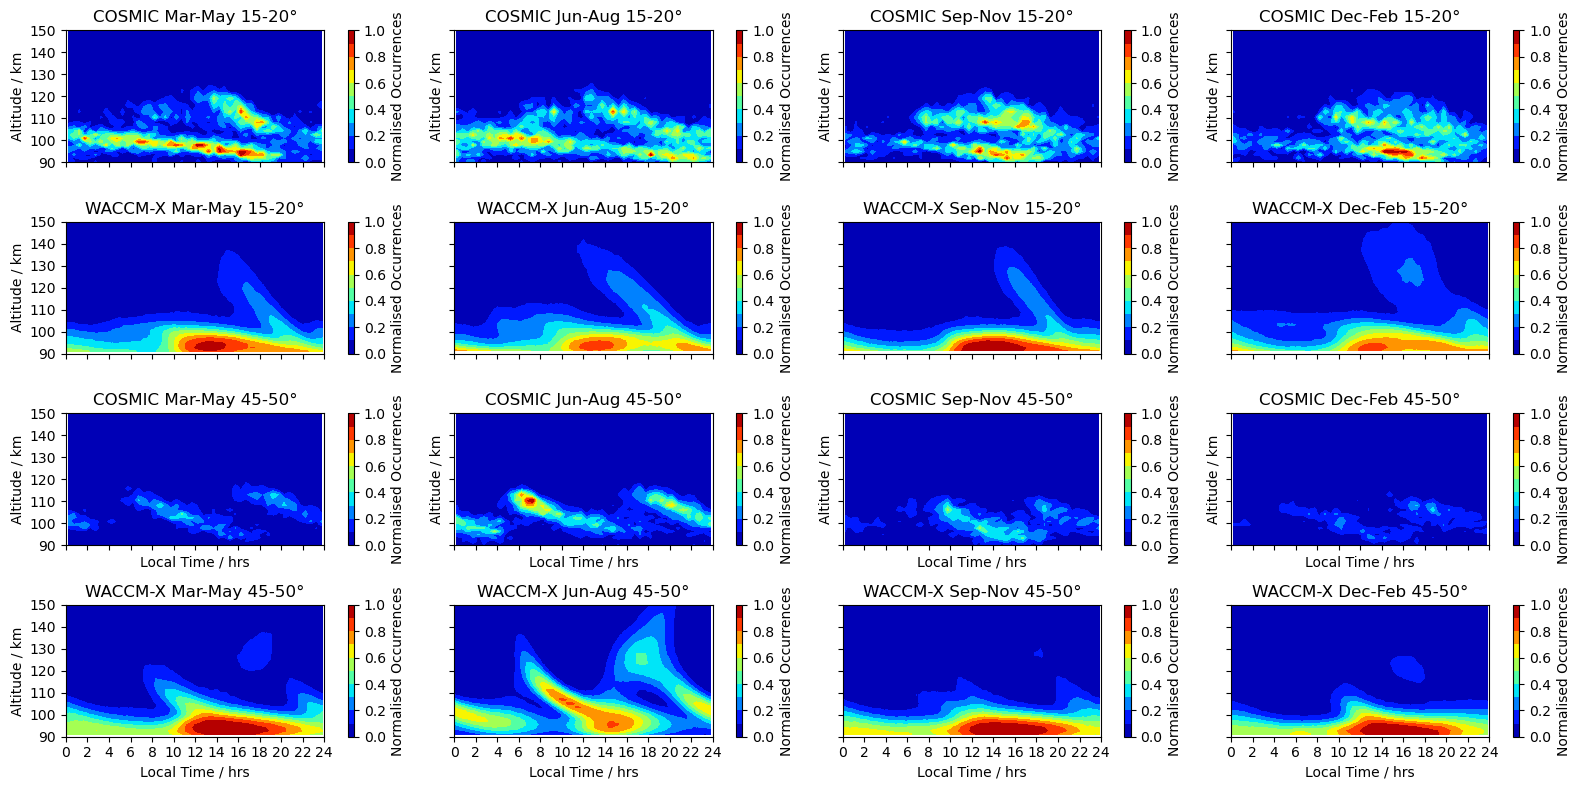

In [126]:
#============================
# Normalised plot 
#============================
# WORKS FOR 5deg lat bins ONLY


# Define common parameters
vmin_cosmic = 0
vmax_cosmic = 1 #32
nolevs_cosmic = 11 #(vmax_cosmic - vmin_cosmic )+ 1

vmin_waccm = 0
vmax_waccm = 1 #12
nolevs_waccm = 11 #(vmax_waccm - vmin_waccm )+ 1 



timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

# Define the latitude slices
latitude_slices = [(15, 20), (45, 50)]

# Create a new figure for plotting
fig, axes = plt.subplots(nrows=len(latitude_slices) * 2, ncols=len(seasons), figsize=(4 * len(seasons), 4 * len(latitude_slices)), sharex=True, sharey=True)

# COSMIC PLOTS
for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices):
        ax = axes[i_lat_band * 2, i_season]

        if i_lat_band < len(latitude_slices):
            data_cosmic = None
            if season.lower() == 'mar-may':
                data_cosmic = SpEs_c_spr_altLT_15_20_norm if (lower_lat, upper_lat) == (15, 20) else SpEs_c_spr_altLT_45_50_norm
            elif season.lower() == 'jun-aug':
                data_cosmic = SpEs_c_sum_altLT_15_20_norm if (lower_lat, upper_lat) == (15, 20) else SpEs_c_sum_altLT_45_50_norm
            elif season.lower() == 'sep-nov':
                data_cosmic = SpEs_c_aut_altLT_15_20_norm if (lower_lat, upper_lat) == (15, 20) else SpEs_c_aut_altLT_45_50_norm
            elif season.lower() == 'dec-feb':
                data_cosmic = SpEs_c_win_altLT_15_20_norm if (lower_lat, upper_lat) == (15, 20) else SpEs_c_win_altLT_45_50_norm


        contour = ax.contourf(LT_spr_altlatLT, alt_spr_altlatLT, data_cosmic, cmap='jet'
                              #, levels=np.linspace(0, 1, 10)
                              , levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic), vmin=vmin_cosmic, vmax=vmax_cosmic
                             )
        
        ax.set_ylabel('Altitude / km')
        if i_season == 0:
            ax.set_ylabel('Altitude / km')
            ax.set_yticks(np.arange(0, plot_alt[0]+10, 10))
        if i_lat_band == 0:
            ax.set_title(f'COSMIC {season}')
        if i_lat_band == len(latitude_slices) - 1:
            ax.set_xlabel('Local Time / hrs')
            xticks = np.linspace(0, 24, 13)
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticks.astype(int))
        #ax.set_ylim(plot_alt[-1], plot_alt[0])
        ax.set_ylim(90, 150)
        ax.set_title(f'COSMIC {season} {lower_lat}-{upper_lat}\u00b0')
        
        cbar = fig.colorbar(contour, ax=ax, pad=0.07)
        cbar.set_label(r'Normalised Occurrences')
    
  

        
# WACCM PLOTS
for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices):
        ax = axes[i_lat_band * 2 + 1, i_season]

        data_waccm = None
        if season.lower() == 'mar-may':
            data_waccm = SpEs_spr_altLT_15_20_norm if (lower_lat, upper_lat) == (15, 20) else SpEs_spr_altLT_45_50_norm
            plot_alt = altavg_sl_spr
        elif season.lower() == 'jun-aug':
            data_waccm = SpEs_sum_altLT_15_20_norm if (lower_lat, upper_lat) == (15, 20) else SpEs_sum_altLT_45_50_norm
            plot_alt = altavg_sl_aut
        elif season.lower() == 'sep-nov':
            data_waccm = SpEs_aut_altLT_15_20_norm if (lower_lat, upper_lat) == (15, 20) else SpEs_aut_altLT_45_50_norm
            plot_alt = altavg_sl_aut
        elif season.lower() == 'dec-feb':
            data_waccm = SpEs_win_altLT_15_20_norm if (lower_lat, upper_lat) == (15, 20) else SpEs_win_altLT_45_50_norm

        contour = ax.contourf(timeplot_144, plot_alt, data_waccm, cmap='jet'
                             , levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm
                             )
        
        
        if i_season == 0:
            ax.set_ylabel('Altitude / km')
        if i_lat_band == 0:
            ax.set_title(f'WACCM-X {season}')
        if i_lat_band == len(latitude_slices) - 1:
            ax.set_xlabel('Local Time / hrs')
            xticks = np.linspace(0, 24, 13)
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticks.astype(int))
        ax.set_ylim(plot_alt[-1], plot_alt[0])
        ax.set_ylim(90, 150)
        
        ax.set_title(f'WACCM-X {season} {lower_lat}-{upper_lat}\u00b0')
        
        cbar = fig.colorbar(contour, ax=ax, pad=0.07)
        cbar.set_label(r'Normalised Occurrences')
        
        
plt.tight_layout()

# Save the figure
figname = f'{run_name}_Daviddata_AltLT_norm.png'
plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT - specific alt - SUMMER AND WINTER

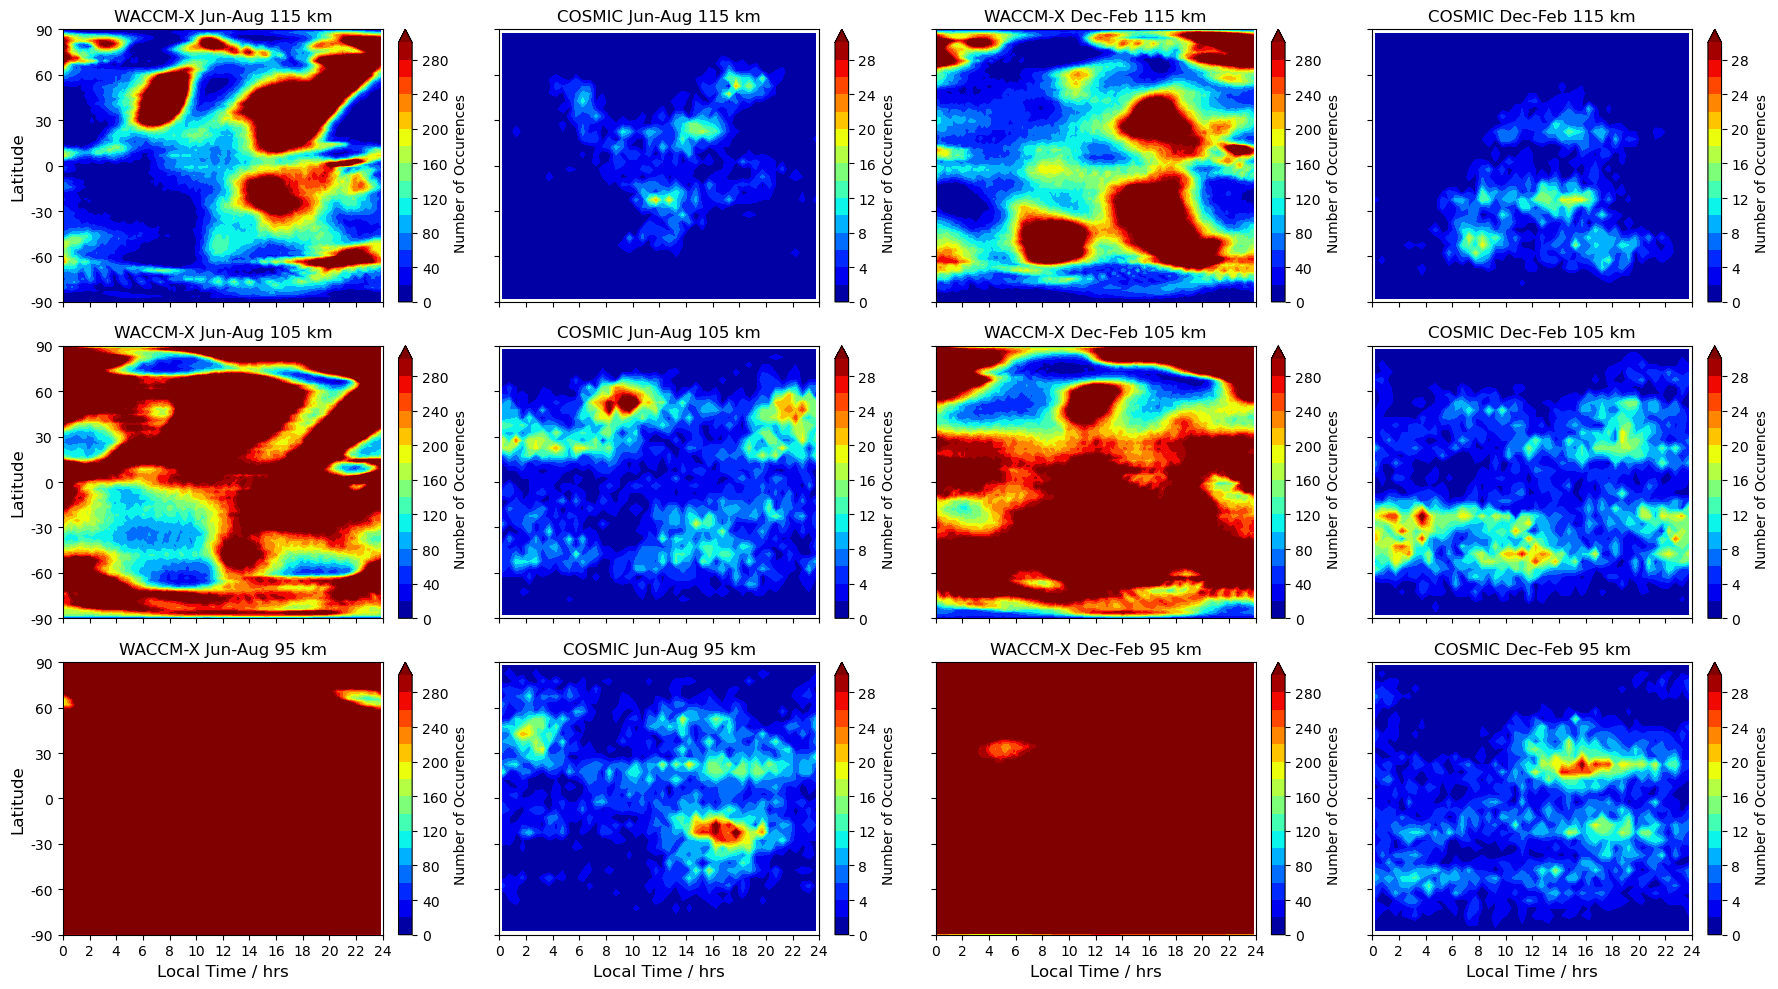

In [121]:
timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

#WACCM
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
winindices = np.argmin(np.abs(altavg_sl_win.values - np.array(plot_alts)[:, None]), axis=1)
sumindices = np.argmin(np.abs(altavg_sl_sum.values - np.array(plot_alts)[:, None]), axis=1)

#COSMIC
cos_alt = alt_sum_altlatLT
cos_ind = np.argmin(np.abs(cos_alt.values - np.array(plot_alts)[:, None]), axis=1)


# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 30
nolevs_cosmic = 16 #(vmax_cosmic - vmin_cosmic )+ 1 
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 300
nolevs_waccm = 16 #(vmax_waccm - vmin_waccm )+ 1 
cmap_waccm = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):
    altindex = winindices[i]
    tot_SpEs_sum_plot = tot_SpEs_sum[altindex, :, :]

    altindex = sumindices[i]
    tot_SpEs_win_plot = tot_SpEs_win[altindex, :, :]


    # WACCM Latitude - Local Time Plots
    subplots_waccm = [tot_SpEs_sum_plot, tot_SpEs_win_plot]
    titles_waccm = ['Jun-Aug', 'Dec-Feb']


    for j, data_waccm in enumerate(subplots_waccm):
        row_waccm = i
        col_waccm = j * 2  # Adjust column index
        ax_waccm = axes_combined[row_waccm, col_waccm]

        C_waccm = ax_waccm.contourf(timeplot_144, lat, data_waccm, cmap=cmap_waccm
                                    ,levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),vmin=vmin_waccm, vmax=vmax_waccm
                                    ,extend='max'
                                    )

        # Set labels and ticks
        if row_waccm == 2:
            ax_waccm.set_xlabel('Local Time / hrs',fontsize=12)
        if col_waccm == 0:
            ax_waccm.set_ylabel('Latitude',fontsize=12)
            ax_waccm.set_yticks(np.linspace(-90, 90, 7))
            ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))
        ax_waccm.set_title(f'WACCM-X {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)
        cbar_waccm.set_label(r'Number of Occurences')
        

    cosaltindex = cos_ind[i]   
    
    # COSMIC Latitude - Local Time Plots
    n_sum_altlatLT_plot = n_sum_altlatLT[cosaltindex,:,:]
    n_win_altlatLT_plot = n_win_altlatLT[cosaltindex,:,:]
    
    subplots_cosmic = [n_sum_altlatLT_plot, n_win_altlatLT_plot]
    titles_cosmic = ['Jun-Aug', 'Dec-Feb']

    for j, data_cosmic in enumerate(subplots_cosmic):
        row_cosmic = i
        col_cosmic = j * 2 + 1  # Adjust column index
        ax_cosmic = axes_combined[row_cosmic, col_cosmic]

        C_cosmic = ax_cosmic.contourf(LT_sum_altlatLT, lat_sum_altlatLT, data_cosmic, cmap=cmap_cosmic
                                      ,levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),vmin=vmin_cosmic, vmax=vmax_cosmic
                                     ,extend='max'
                                     )

        # Set labels and ticks
        if col_cosmic == 1:
            #ax_cosmic.set_ylabel('Latitude')
            ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
            ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        if row_cosmic == 2:
            ax_cosmic.set_xlabel('Local Time / hrs',fontsize=12)
        xticks_cosmic = np.linspace(0, 24, 13)
        ax_cosmic.set_xticks(xticks_cosmic)
        ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
        ax_cosmic.set_title(f'COSMIC {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)
        cbar_cosmic.set_label(r'Number of Occurences')



plt.tight_layout()

figname_combined = f'{run_name}_Daviddata_Lat_vs_LT_3xalt_sum-win.png'
#plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


In [122]:
# Normalise Data
#============================

plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low

winindices = np.argmin(np.abs(altavg_sl_win.values - np.array(plot_alts)[:, None]), axis=1)
sumindices = np.argmin(np.abs(altavg_sl_sum.values - np.array(plot_alts)[:, None]), axis=1)
autindices = np.argmin(np.abs(altavg_sl_aut.values - np.array(plot_alts)[:, None]), axis=1)
sprindices = np.argmin(np.abs(altavg_sl_spr.values - np.array(plot_alts)[:, None]), axis=1)


waccm_data_sum = xr.DataArray(tot_SpEs_sum[sumindices, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'summer'})
waccm_data_win = xr.DataArray(tot_SpEs_win[winindices, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'winter'})
waccm_data_spr = xr.DataArray(tot_SpEs_spr[sprindices, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'spring'})
waccm_data_aut = xr.DataArray(tot_SpEs_aut[autindices, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'autumn'})

combined_w = xr.concat([waccm_data_sum, waccm_data_win, waccm_data_spr, waccm_data_aut], dim='season')

overall_min_w = combined_w.min(dim=['season', 'alt', 'lat', 'LT_L'])
overall_max_w = combined_w.max(dim=['season', 'alt', 'lat', 'LT_L'])


tot_SpEs_sum_115_norm = (tot_SpEs_sum[sumindices[0], :, :] - overall_min_w) / (overall_max_w - overall_min_w)
tot_SpEs_sum_105_norm = (tot_SpEs_sum[sumindices[1], :, :] - overall_min_w) / (overall_max_w - overall_min_w)
tot_SpEs_sum_95_norm =  (tot_SpEs_sum[sumindices[2], :, :] - overall_min_w) / (overall_max_w - overall_min_w)

tot_SpEs_win_115_norm = (tot_SpEs_win[winindices[0], :, :] - overall_min_w) / (overall_max_w - overall_min_w)
tot_SpEs_win_105_norm = (tot_SpEs_win[winindices[1], :, :] - overall_min_w) / (overall_max_w - overall_min_w)
tot_SpEs_win_95_norm =  (tot_SpEs_win[winindices[2], :, :] - overall_min_w) / (overall_max_w - overall_min_w)

tot_SpEs_spr_115_norm = (tot_SpEs_spr[sprindices[0], :, :] - overall_min_w) / (overall_max_w - overall_min_w)
tot_SpEs_spr_105_norm = (tot_SpEs_spr[sprindices[1], :, :] - overall_min_w) / (overall_max_w - overall_min_w)
tot_SpEs_spr_95_norm =  (tot_SpEs_spr[sprindices[2], :, :] - overall_min_w) / (overall_max_w - overall_min_w)

tot_SpEs_aut_115_norm = (tot_SpEs_aut[autindices[0], :, :] - overall_min_w) / (overall_max_w - overall_min_w)
tot_SpEs_aut_105_norm = (tot_SpEs_aut[autindices[1], :, :] - overall_min_w) / (overall_max_w - overall_min_w)
tot_SpEs_aut_95_norm =  (tot_SpEs_aut[autindices[2], :, :] - overall_min_w) / (overall_max_w - overall_min_w)

#======================================


# COSMIC

sprindices_c = np.argmin(np.abs(alt_spr_altlatLT.values - np.array(plot_alts)[:, None]), axis=1)
sumindices_c = np.argmin(np.abs(alt_sum_altlatLT.values - np.array(plot_alts)[:, None]), axis=1)
autindices_c = np.argmin(np.abs(alt_aut_altlatLT.values - np.array(plot_alts)[:, None]), axis=1)
winindices_c = np.argmin(np.abs(alt_win_altlatLT.values - np.array(plot_alts)[:, None]), axis=1)


cosmic_data_sum = xr.DataArray(n_sum_altlatLT[sumindices_c, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'summer'})
cosmic_data_win = xr.DataArray(n_win_altlatLT[winindices_c, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'winter'})
cosmic_data_spr = xr.DataArray(n_spr_altlatLT[sprindices_c, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'spring'})
cosmic_data_aut = xr.DataArray(n_aut_altlatLT[autindices_c, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'autumn'})

combined_c = xr.concat([cosmic_data_sum, cosmic_data_win, cosmic_data_spr, cosmic_data_aut], dim='season')

overall_min_c = combined_c.min(dim=['season', 'alt', 'lat', 'LT_L'])
overall_max_c = combined_c.max(dim=['season', 'alt', 'lat', 'LT_L'])


n_spr_altlatLT_115_norm = (n_spr_altlatLT[sprindices_c[0], :, :] - overall_min_c) / (overall_max_c - overall_min_c)
n_spr_altlatLT_105_norm = (n_spr_altlatLT[sprindices_c[1], :, :] - overall_min_c) / (overall_max_c - overall_min_c)
n_spr_altlatLT_95_norm = (n_spr_altlatLT[sprindices_c[2], :, :] - overall_min_c) / (overall_max_c - overall_min_c)

n_sum_altlatLT_115_norm = (n_sum_altlatLT[sumindices_c[0], :, :] - overall_min_c) / (overall_max_c - overall_min_c)
n_sum_altlatLT_105_norm = (n_sum_altlatLT[sumindices_c[1], :, :] - overall_min_c) / (overall_max_c - overall_min_c)
n_sum_altlatLT_95_norm = (n_sum_altlatLT[sumindices_c[2], :, :] - overall_min_c) / (overall_max_c - overall_min_c)

n_aut_altlatLT_115_norm = (n_aut_altlatLT[autindices_c[0], :, :] - overall_min_c) / (overall_max_c - overall_min_c)
n_aut_altlatLT_105_norm = (n_aut_altlatLT[autindices_c[1], :, :] - overall_min_c) / (overall_max_c - overall_min_c)
n_aut_altlatLT_95_norm = (n_aut_altlatLT[autindices_c[2], :, :] - overall_min_c) / (overall_max_c - overall_min_c)

n_win_altlatLT_115_norm = (n_win_altlatLT[winindices_c[0], :, :] - overall_min_c) / (overall_max_c - overall_min_c)
n_win_altlatLT_105_norm = (n_win_altlatLT[winindices_c[1], :, :] - overall_min_c) / (overall_max_c - overall_min_c)
n_win_altlatLT_95_norm = (n_win_altlatLT[winindices_c[2], :, :] - overall_min_c) / (overall_max_c - overall_min_c)


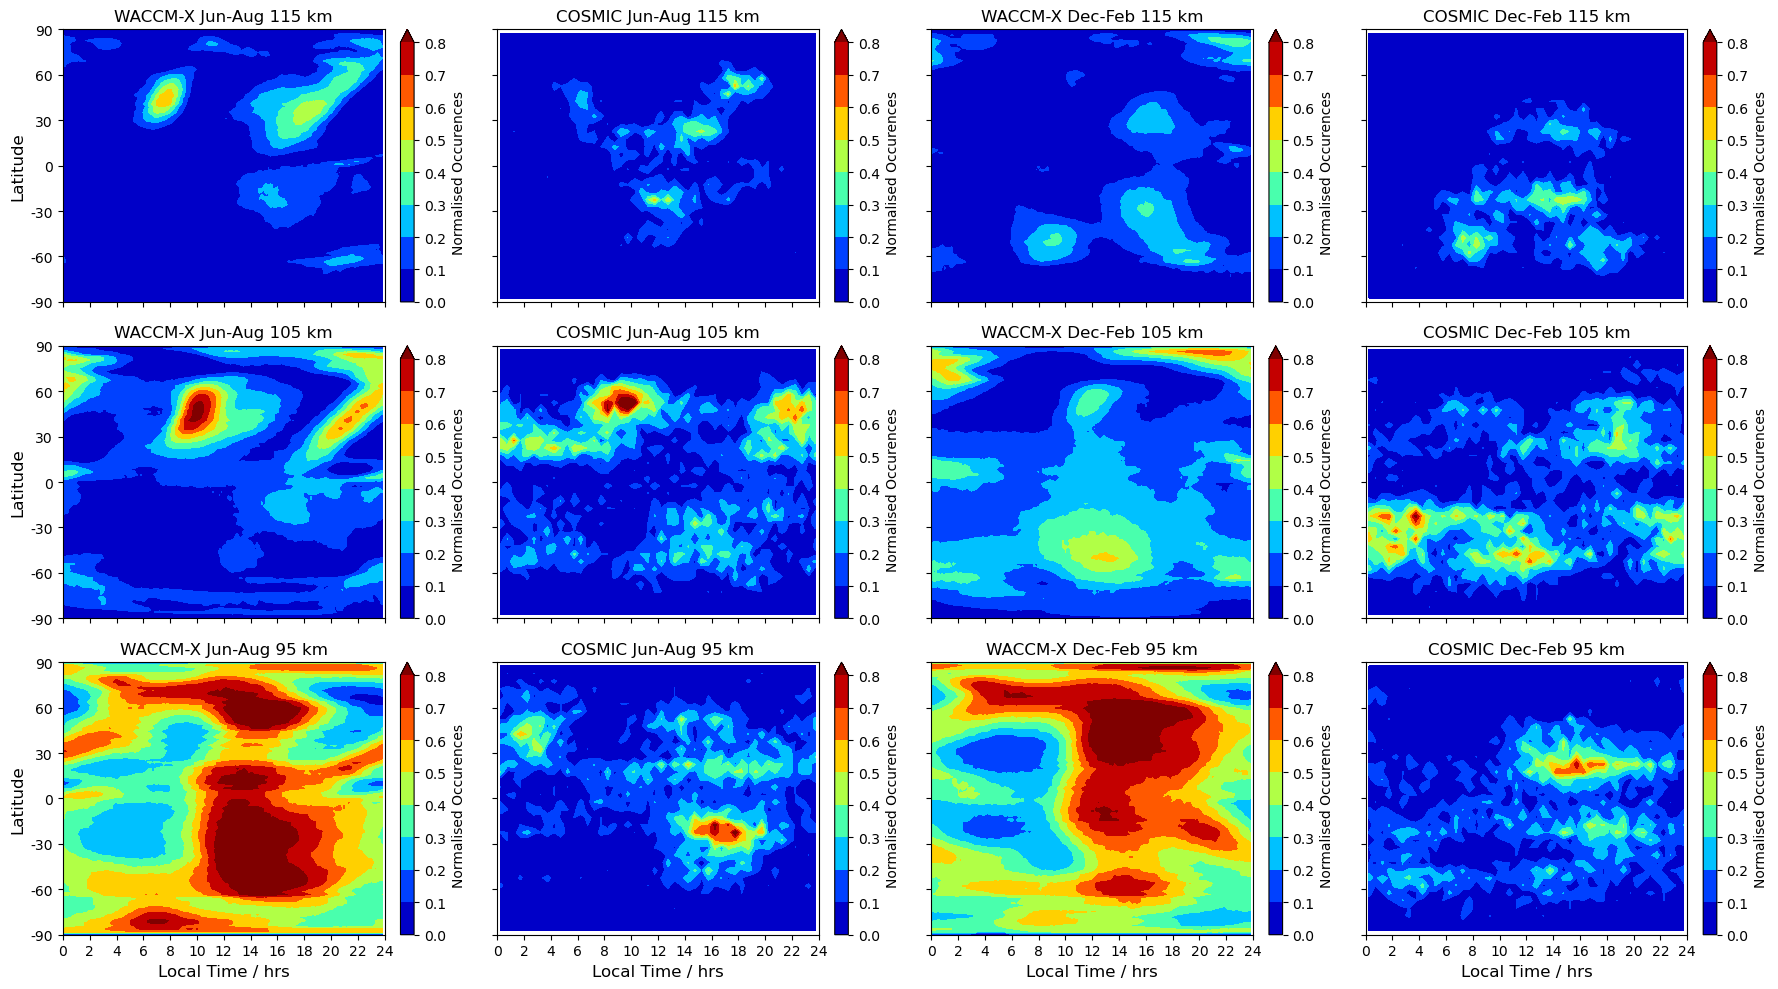

In [123]:
#==============================
# Plot Normalised Data 
#==============================

timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

#WACCM
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
winindices = np.argmin(np.abs(altavg_sl_win.values - np.array(plot_alts)[:, None]), axis=1)
sumindices = np.argmin(np.abs(altavg_sl_sum.values - np.array(plot_alts)[:, None]), axis=1)

#COSMIC
cos_alt = alt_sum_altlatLT
cos_ind = np.argmin(np.abs(cos_alt.values - np.array(plot_alts)[:, None]), axis=1)


# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 0.8
nolevs_cosmic = 9 #(vmax_cosmic - vmin_cosmic )+ 1 
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 0.8
nolevs_waccm = 9 #(vmax_waccm - vmin_waccm )+ 1 
cmap_waccm = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):

    if ialt == 115:
        sum_data = tot_SpEs_sum_115_norm
        win_data = tot_SpEs_win_115_norm
    elif ialt == 105:
        sum_data = tot_SpEs_sum_105_norm
        win_data = tot_SpEs_win_105_norm
    else:
        sum_data = tot_SpEs_sum_95_norm
        win_data = tot_SpEs_win_95_norm
        
    # WACCM Latitude - Local Time Plots
    subplots_waccm = [sum_data, win_data]
    titles_waccm = ['Jun-Aug', 'Dec-Feb']

    for j, data_waccm in enumerate(subplots_waccm):
        row_waccm = i
        col_waccm = j * 2  # Adjust column index
        ax_waccm = axes_combined[row_waccm, col_waccm]

        C_waccm = ax_waccm.contourf(timeplot_144, lat, data_waccm, cmap=cmap_waccm
                                    ,levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),vmin=vmin_waccm, vmax=vmax_waccm
                                    ,extend='max'
                                    )

        # Set labels and ticks
        if row_waccm == 2:
            ax_waccm.set_xlabel('Local Time / hrs',fontsize=12)
        if col_waccm == 0:
            ax_waccm.set_ylabel('Latitude',fontsize=12)
            ax_waccm.set_yticks(np.linspace(-90, 90, 7))
            ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))
        ax_waccm.set_title(f'WACCM-X {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)
        cbar_waccm.set_label(r'Normalised Occurences')
        

    if ialt == 115:
        sum_data_c = n_sum_altlatLT_115_norm
        win_data_c = n_win_altlatLT_115_norm
    elif ialt == 105:
        sum_data_c = n_sum_altlatLT_105_norm
        win_data_c = n_win_altlatLT_105_norm
    else:
        sum_data_c = n_sum_altlatLT_95_norm
        win_data_c = n_win_altlatLT_95_norm
        
    subplots_cosmic = [sum_data_c, win_data_c]
    titles_cosmic = ['Jun-Aug', 'Dec-Feb']

    for j, data_cosmic in enumerate(subplots_cosmic):
        row_cosmic = i
        col_cosmic = j * 2 + 1  # Adjust column index
        ax_cosmic = axes_combined[row_cosmic, col_cosmic]

        C_cosmic = ax_cosmic.contourf(LT_sum_altlatLT, lat_sum_altlatLT, data_cosmic, cmap=cmap_cosmic
                                      ,levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),vmin=vmin_cosmic, vmax=vmax_cosmic
                                     ,extend='max'
                                     )

        # Set labels and ticks
        if col_cosmic == 1:
            #ax_cosmic.set_ylabel('Latitude')
            ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
            ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        if row_cosmic == 2:
            ax_cosmic.set_xlabel('Local Time / hrs',fontsize=12)
        xticks_cosmic = np.linspace(0, 24, 13)
        ax_cosmic.set_xticks(xticks_cosmic)
        ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
        ax_cosmic.set_title(f'COSMIC {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)
        cbar_cosmic.set_label(r'Normalised Occurences')



plt.tight_layout()

figname_combined = f'{run_name}_Daviddata_Lat_vs_LT_3xalt_sum-win_norm.png'
plt.savefig(f'./Figures/Combined/{filename_append}/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()

# Lat - LT - specific alt - SPRING AND AUTUMN

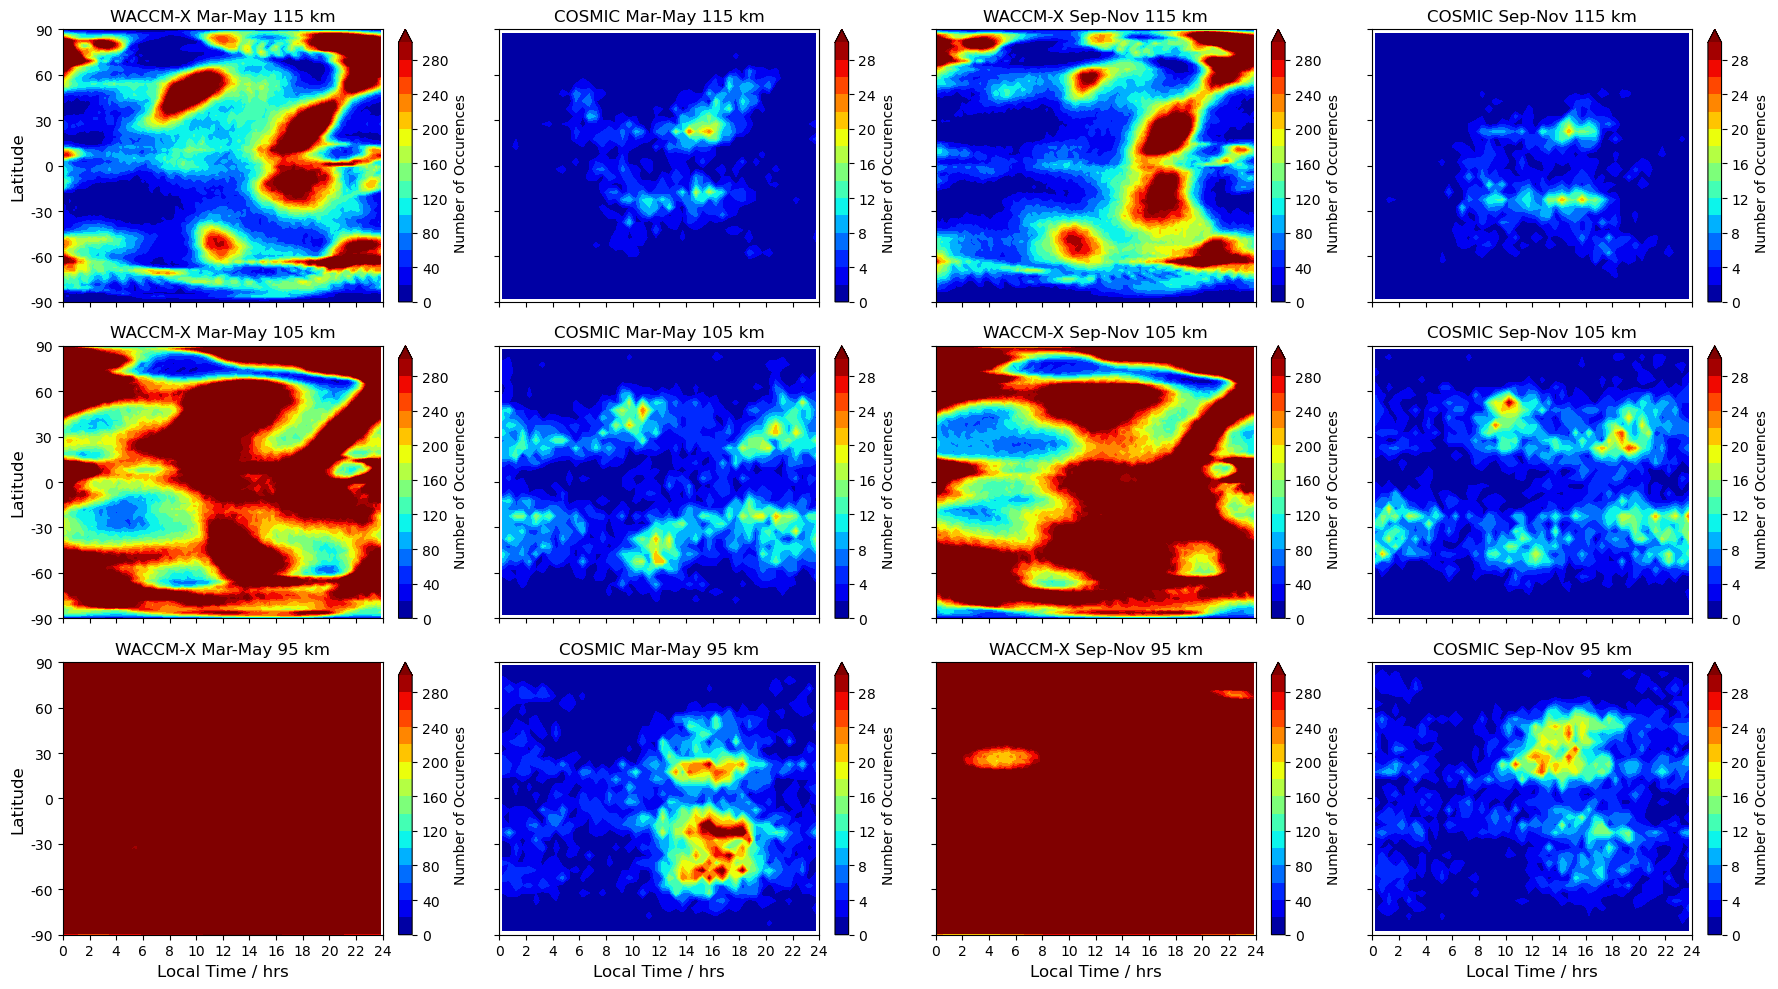

In [124]:
timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

#WACCM
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
autindices = np.argmin(np.abs(altavg_sl_aut.values - np.array(plot_alts)[:, None]), axis=1)
sprindices = np.argmin(np.abs(altavg_sl_spr.values - np.array(plot_alts)[:, None]), axis=1)

#COSMIC
cos_alt = alt_spr_altlatLT
cos_ind = np.argmin(np.abs(cos_alt.values - np.array(plot_alts)[:, None]), axis=1)


# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 30
nolevs_cosmic = 16 #(vmax_cosmic - vmin_cosmic )+ 1 
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 300
nolevs_waccm = 16 #(vmax_waccm - vmin_waccm )+ 1 
cmap_waccm = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):
    altindex = autindices[i]
    tot_SpEs_spr_plot = tot_SpEs_spr[altindex, :, :]

    altindex = sprindices[i]
    tot_SpEs_aut_plot = tot_SpEs_aut[altindex, :, :]


    # WACCM Latitude - Local Time Plots
    subplots_waccm = [tot_SpEs_spr_plot, tot_SpEs_aut_plot]
    titles_waccm = ['Mar-May', 'Sep-Nov']


    for j, data_waccm in enumerate(subplots_waccm):
        row_waccm = i
        col_waccm = j * 2  # Adjust column index
        ax_waccm = axes_combined[row_waccm, col_waccm]

        C_waccm = ax_waccm.contourf(timeplot_144, lat, data_waccm, cmap=cmap_waccm
                                    ,levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),vmin=vmin_waccm, vmax=vmax_waccm
                                    ,extend='max'
                                    )

        # Set labels and ticks
        if row_waccm == 2:
            ax_waccm.set_xlabel('Local Time / hrs',fontsize=12)
        if col_waccm == 0:
            ax_waccm.set_ylabel('Latitude',fontsize=12)
            ax_waccm.set_yticks(np.linspace(-90, 90, 7))
            ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))
        ax_waccm.set_title(f'WACCM-X {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)
        cbar_waccm.set_label(r'Number of Occurences')
        

    cosaltindex = cos_ind[i]   
    
    # COSMIC Latitude - Local Time Plots
    n_spr_altlatLT_plot = n_spr_altlatLT[cosaltindex,:,:]
    n_aut_altlatLT_plot = n_aut_altlatLT[cosaltindex,:,:]
    
    subplots_cosmic = [n_spr_altlatLT_plot, n_aut_altlatLT_plot]
    titles_cosmic = ['Mar-May', 'Sep-Nov']

    for j, data_cosmic in enumerate(subplots_cosmic):
        row_cosmic = i
        col_cosmic = j * 2 + 1  # Adjust column index
        ax_cosmic = axes_combined[row_cosmic, col_cosmic]

        C_cosmic = ax_cosmic.contourf(LT_spr_altlatLT, lat_spr_altlatLT, data_cosmic, cmap=cmap_cosmic
                                      ,levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),vmin=vmin_cosmic, vmax=vmax_cosmic
                                     ,extend='max'
                                     )

        # Set labels and ticks
        if col_cosmic == 1:
            #ax_cosmic.set_ylabel('Latitude')
            ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
            ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        if row_cosmic == 2:
            ax_cosmic.set_xlabel('Local Time / hrs',fontsize=12)
        xticks_cosmic = np.linspace(0, 24, 13)
        ax_cosmic.set_xticks(xticks_cosmic)
        ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
        ax_cosmic.set_title(f'COSMIC {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)
        cbar_cosmic.set_label(r'Number of Occurences')



plt.tight_layout()

figname_combined = f'{run_name}_Daviddata_Lat_vs_LT_3xalt_spr-aut.png'
#plt.savefig(f'./Figures/Combined/{filename_append}/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


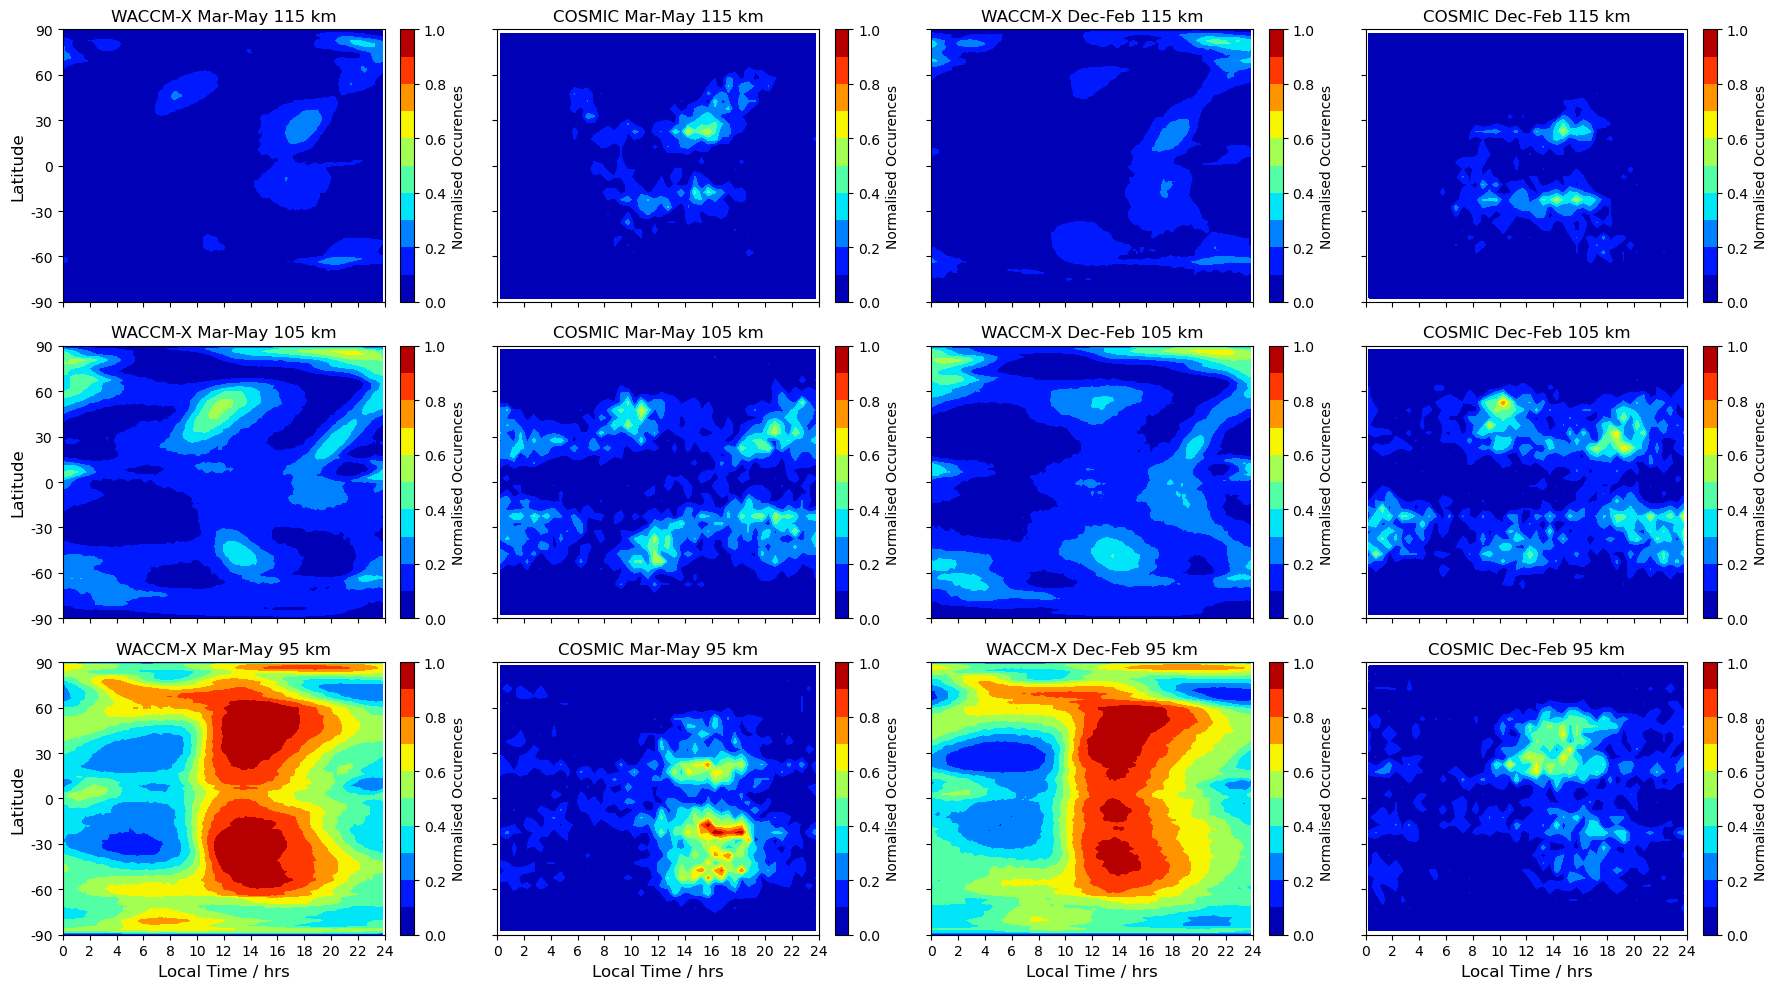

In [125]:
#==============================
# Plot Normalised Data 
#==============================

timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

#WACCM
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
autindices = np.argmin(np.abs(altavg_sl_aut.values - np.array(plot_alts)[:, None]), axis=1)
sprindices = np.argmin(np.abs(altavg_sl_spr.values - np.array(plot_alts)[:, None]), axis=1)

#COSMIC
cos_alt = alt_spr_altlatLT
cos_ind = np.argmin(np.abs(cos_alt.values - np.array(plot_alts)[:, None]), axis=1)


# Combine COSMIC and WACCM Latitude - Local Time Plots
fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

# Set common colorbar properties
vmin_cosmic = 0
vmax_cosmic = 1
nolevs_cosmic = 11 #(vmax_cosmic - vmin_cosmic )+ 1 
cmap_cosmic = plt.get_cmap('jet')

vmin_waccm = 0
vmax_waccm = 1
nolevs_waccm = 11 #(vmax_waccm - vmin_waccm )+ 1 
cmap_waccm = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):

    if ialt == 115:
        spr_data = tot_SpEs_spr_115_norm
        aut_data = tot_SpEs_aut_115_norm
    elif ialt == 105:
        spr_data = tot_SpEs_spr_105_norm
        aut_data = tot_SpEs_aut_105_norm
    else:
        spr_data = tot_SpEs_spr_95_norm
        aut_data = tot_SpEs_aut_95_norm
        
    # WACCM Latitude - Local Time Plots
    subplots_waccm = [spr_data, aut_data]
    titles_waccm = ['Mar-May', 'Dec-Feb']

    for j, data_waccm in enumerate(subplots_waccm):
        row_waccm = i
        col_waccm = j * 2  # Adjust column index
        ax_waccm = axes_combined[row_waccm, col_waccm]

        C_waccm = ax_waccm.contourf(timeplot_144, lat, data_waccm, cmap=cmap_waccm
                                    ,levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm),vmin=vmin_waccm, vmax=vmax_waccm
                                   # ,extend='max'
                                    )

        # Set labels and ticks
        if row_waccm == 2:
            ax_waccm.set_xlabel('Local Time / hrs',fontsize=12)
        if col_waccm == 0:
            ax_waccm.set_ylabel('Latitude',fontsize=12)
            ax_waccm.set_yticks(np.linspace(-90, 90, 7))
            ax_waccm.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_waccm = np.linspace(0, 24, 13)
        ax_waccm.set_xticks(xticks_waccm)
        ax_waccm.set_xticklabels(xticks_waccm.astype(int))
        ax_waccm.set_title(f'WACCM-X {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_waccm = fig_combined.colorbar(C_waccm, ax=ax_waccm, pad=0.04)
        cbar_waccm.set_label(r'Normalised Occurences')
        

    if ialt == 115:
        spr_data_c = n_spr_altlatLT_115_norm
        aut_data_c = n_aut_altlatLT_115_norm
    elif ialt == 105:
        spr_data_c = n_spr_altlatLT_105_norm
        aut_data_c = n_aut_altlatLT_105_norm
    else:
        spr_data_c = n_spr_altlatLT_95_norm
        aut_data_c = n_aut_altlatLT_95_norm
        
    subplots_cosmic = [spr_data_c, aut_data_c]
    titles_cosmic = ['Mar-May', 'Dec-Feb']

    for j, data_cosmic in enumerate(subplots_cosmic):
        row_cosmic = i
        col_cosmic = j * 2 + 1  # Adjust column index
        ax_cosmic = axes_combined[row_cosmic, col_cosmic]

        C_cosmic = ax_cosmic.contourf(LT_spr_altlatLT, lat_spr_altlatLT, data_cosmic, cmap=cmap_cosmic
                                      ,levels=np.linspace(vmin_cosmic, vmax_cosmic, nolevs_cosmic),vmin=vmin_cosmic, vmax=vmax_cosmic
                                    # ,extend='max'
                                     )

        # Set labels and ticks
        if col_cosmic == 1:
            #ax_cosmic.set_ylabel('Latitude')
            ax_cosmic.set_yticks(np.linspace(-90, 90, 7))
            ax_cosmic.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        if row_cosmic == 2:
            ax_cosmic.set_xlabel('Local Time / hrs',fontsize=12)
        xticks_cosmic = np.linspace(0, 24, 13)
        ax_cosmic.set_xticks(xticks_cosmic)
        ax_cosmic.set_xticklabels(xticks_cosmic.astype(int))
        ax_cosmic.set_title(f'COSMIC {titles_waccm[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_cosmic = fig_combined.colorbar(C_cosmic, ax=ax_cosmic, pad=0.04)
        cbar_cosmic.set_label(r'Normalised Occurences')



plt.tight_layout()

figname_combined = f'{run_name}_Daviddata_Lat_vs_LT_3xalt_spr-aut_norm.png'
plt.savefig(f'./Figures/Combined/{filename_append}/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()